# PM-PR-0012

Business Case Problems:

1. Predicting High Priority Tickets: To predict priority 1 & 2 tickets, so that they can take preventive measures or fix the problem before it surfaces.
2. Forecast the incident volume in different fields,quarterly and annual. So that they can be better prepared with resources and technology planning.
3. Auto tag the tickets with right priorities and right departments so that reassigning and related delay can be reduced.
4. Predict RFC (Request for change) and possible failure / misconfiguration of ITSM assets.

## Install Packages and Importing required Libraries

In [ ]:
pip install mysql-connector-python pandas

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 33.9/33.9 MB 59.5 MB/s eta 0:00:00


In [ ]:
import mysql.connector
import pandas as pd

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
host = '18.136.157.135'
user = 'dm_team'
password = 'DM!$Team@&27920!'
database = 'project_itsm'

In [ ]:
conn = mysql.connector.connect(
    host=host,
    user=user,
    password=password,
    database=database
)

In [ ]:
cursor = conn.cursor()

In [ ]:
cursor.execute("SHOW TABLES;")
tables = cursor.fetchall()

In [ ]:
print("Available Tables:")
for table in tables:
    print(table[0])

Available Tables:
dataset_list


In [ ]:
#table_name = tables[0][0]

In [ ]:
query = "SELECT * FROM dataset_list;"
df = pd.read_sql(query, conn)

In [ ]:
# Close connection
cursor.close()
conn.close()

In [ ]:
df.head(7)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Reopen_Time,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,,04-11-2013 13:50,04-11-2013 13:51,"3,87,16,91,111",Other,1,SD0000007,2,,
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,02-12-2013 12:31,02-12-2013 12:36,02-12-2013 12:36,"4,35,47,86,389",Software,1,SD0000011,1,,
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,NS,3,NA,0.517551335,...,,13-01-2014 15:12,13-01-2014 15:13,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,,14-11-2013 09:31,14-11-2013 09:31,"4,32,18,33,333",Operator error,1,SD0000025,,,
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,,08-11-2013 13:55,08-11-2013 13:55,"3,38,39,03,333",Other,1,SD0000029,,,
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4,0.006675648,...,,08-11-2013 13:54,08-11-2013 13:54,"3,38,34,36,944",Other,1,SD0000031,,,
6,WBA000082,application,Web Based Application,WBS000055,IM0000014,Closed,4,4,4,0.19290712,...,,27-12-2013 10:59,27-12-2013 10:59,"3,70,31,91,389",Unknown,1,SD0000033,,,


In [ ]:
df.shape

(46606, 25)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46606 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46606 non-null  object
 1   CI_Cat                      46606 non-null  object
 2   CI_Subcat                   46606 non-null  object
 3   WBS                         46606 non-null  object
 4   Incident_ID                 46606 non-null  object
 5   Status                      46606 non-null  object
 6   Impact                      46606 non-null  object
 7   Urgency                     46606 non-null  object
 8   Priority                    46606 non-null  object
 9   number_cnt                  46606 non-null  object
 10  Category                    46606 non-null  object
 11  KB_number                   46606 non-null  object
 12  Alert_Status                46606 non-null  object
 13  No_of_Reassignments         46606 non-null  ob

## Feature Engineering

In [ ]:
df['Priority'].value_counts()

,count
Priority,
4,22717
5,16486
3,5323
NA,1380
2,697
1,3


'NA' has the count of 1380, so if we tries to replace it with statistical imputations such as mode value, the most occurence value is 4, but we no need for it. So instead we will replace it manually with logical reasoning that value 1 contains the least count of 3. So that we'll replace 'NA' with 1.



In [ ]:
df['Priority'].replace('NA', 1, inplace=True)

In [ ]:
df['Priority'].value_counts()

,count
Priority,
4,22717
5,16486
3,5323
1,1380
2,697
1,3


In [ ]:
df['Priority'] = df['Priority'].astype(int)

In [ ]:
df['Impact'].value_counts()

,count
Impact,
4,22556
5,16741
3,5234
NS,1380
2,692
1,3


Same decision taken in previous feature 'Priority', will be repeated for this 'Impact' feature. So here 'NS' will be replace with value 1.

In [ ]:
df['Impact'].replace('NS', 1, inplace=True)

In [ ]:
df['Impact'].value_counts()

,count
Impact,
4,22556
5,16741
3,5234
1,1380
2,692
1,3


In [ ]:
df['Impact'] = df['Impact'].astype(int)

In [ ]:
df['Urgency'].value_counts()

,count
Urgency,
4,22588
5,16779
3,6536
2,696
1,6
5 - Very Low,1


In [ ]:
#df.loc[df['Urgency']=='5 - Very Low']
df.drop(df[df['Urgency']=='5 - Very Low'].index,inplace=True)

In [ ]:
df['Urgency'].value_counts()

,count
Urgency,
4,22588
5,16779
3,6536
2,696
1,6


In [ ]:
df['Urgency'] = df['Urgency'].astype(int)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 25 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   CI_Name                     46605 non-null  object
 1   CI_Cat                      46605 non-null  object
 2   CI_Subcat                   46605 non-null  object
 3   WBS                         46605 non-null  object
 4   Incident_ID                 46605 non-null  object
 5   Status                      46605 non-null  object
 6   Impact                      46605 non-null  int64 
 7   Urgency                     46605 non-null  int64 
 8   Priority                    46605 non-null  int64 
 9   number_cnt                  46605 non-null  object
 10  Category                    46605 non-null  object
 11  KB_number                   46605 non-null  object
 12  Alert_Status                46605 non-null  object
 13  No_of_Reassignments         46605 non-null  object


In [ ]:
co_relate = df[['Impact','Urgency','Priority']]

<Axes: >

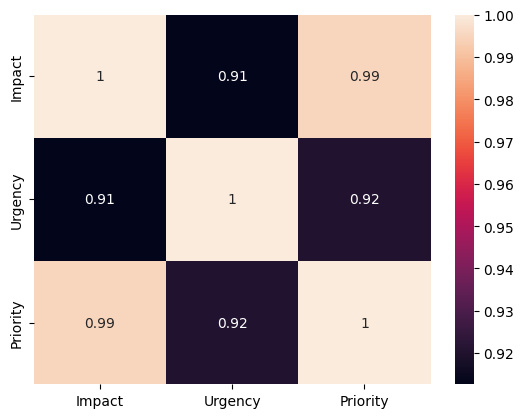

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.heatmap(co_relate.corr(), annot=True)

Columns such as Impact, Urgency and Priority are highly positive correlated.

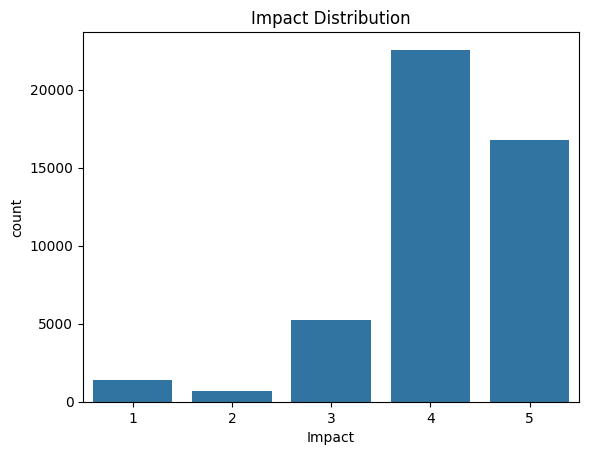

In [ ]:
plt.title('Impact Distribution')
sns.countplot(x='Impact', data=df);

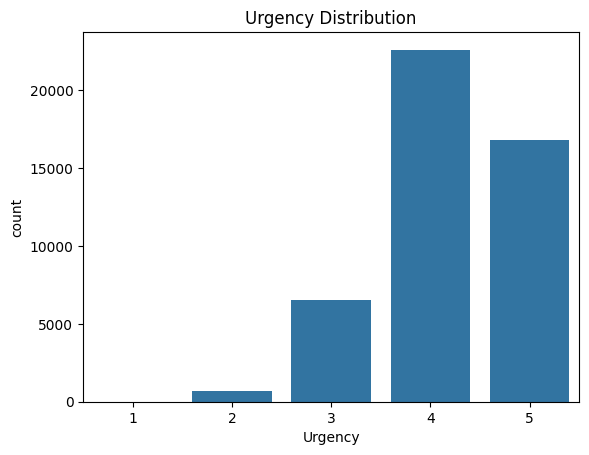

In [ ]:
plt.title('Urgency Distribution')
sns.countplot(x='Urgency', data=df);

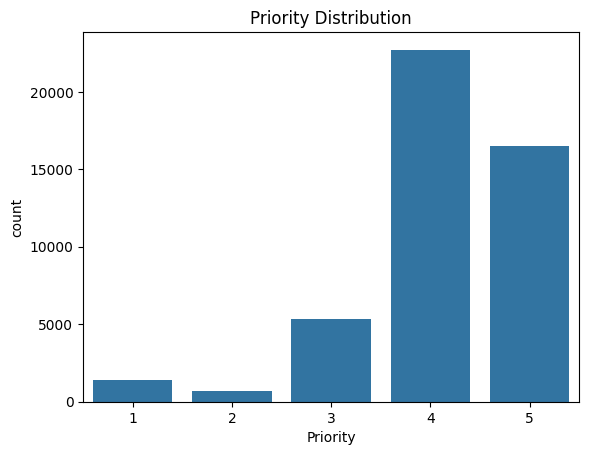

In [ ]:
plt.title('Priority Distribution')
sns.countplot(x='Priority', data=df);

In [ ]:
# Creating a new column for classifying the 2 types of categories
def priority_state(a):
  if a in [1,2]:
    return 'High'
  elif a in [0,3,4,5]:
    return 'Low'
df['Priority_Status'] = df['Priority'].apply(priority_state)

In [ ]:
df['Priority_Status'].value_counts()

,count
Priority_Status,
Low,44525
High,2080


It is an imbalanced dataset with binary classification so any of the sampling technique using SMOTE have to be applied.

In [ ]:
df.sample(5)

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Priority_Status
8796,SBA000464,application,Server Based Application,WBS000073,IM0008960,Closed,4,4,4,0.617403245,...,29-10-2013 12:08,29-10-2013 12:08,"2,01,86,11,111",Software,1,SD0024092,,,,Low
21080,SUB000479,subapplication,Web Based Application,WBS000015,IM0021313,Closed,4,4,4,0.954197776,...,13-12-2013 14:28,13-12-2013 14:28,"1,35,61,11,111",Other,1,SD0062560,,,,Low
968,SBA000759,application,Server Based Application,WBS000296,IM0001065,Closed,4,4,4,0.294023617,...,03-10-2013 14:48,03-10-2013 14:48,"3,67,99,44,444",Other,1,SD0001332,,,,Low
1044,WBA000133,application,Web Based Application,WBS000073,IM0001141,Closed,4,4,4,0.376437523,...,10-10-2013 12:44,10-10-2013 12:44,"2,49,66,94,444",Software,1,SD0001353,,,,Low
36234,SBA000263,application,Server Based Application,WBS000072,IM0036544,Closed,5,5,5,0.237028211,...,13-02-2014 13:21,13-02-2014 13:21,"0,683333333",Other,1,SD0111643,,,,Low


In [ ]:
df['Open_Time'] = pd.to_datetime(df['Open_Time'], format='%d-%m-%Y %H:%M')
df['Reopen_Time'] = pd.to_datetime(df['Reopen_Time'], format='%d-%m-%Y %H:%M')
df['Resolved_Time'] = pd.to_datetime(df['Resolved_Time'], format='%d-%m-%Y %H:%M')
df['Close_Time'] = pd.to_datetime(df['Close_Time'], format='%d-%m-%Y %H:%M')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 26 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Name                     46605 non-null  object        
 1   CI_Cat                      46605 non-null  object        
 2   CI_Subcat                   46605 non-null  object        
 3   WBS                         46605 non-null  object        
 4   Incident_ID                 46605 non-null  object        
 5   Status                      46605 non-null  object        
 6   Impact                      46605 non-null  int64         
 7   Urgency                     46605 non-null  int64         
 8   Priority                    46605 non-null  int64         
 9   number_cnt                  46605 non-null  object        
 10  Category                    46605 non-null  object        
 11  KB_number                   46605 non-null  object        


In [ ]:
df['Open_Time'].nunique()

34635

In [ ]:
df['Close_Time'].nunique()

34528

In [ ]:
df['Open_Time'].nunique()

34635

In [ ]:
df['Resolved_Time'].nunique()

33627

In [ ]:
df['Close_Time'].nunique()

34528

In [ ]:
df[df['Related_Change']=='']

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Priority_Status
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,2013-11-04 13:50:00,2013-11-04 13:51:00,"3,87,16,91,111",Other,1,SD0000007,2,,,Low
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,2013-12-02 12:36:00,2013-12-02 12:36:00,"4,35,47,86,389",Software,1,SD0000011,1,,,Low
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,1,3,1,0.517551335,...,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,,High
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1,SD0000025,,,,Low
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,2013-11-08 13:55:00,2013-11-08 13:55:00,"3,38,39,03,333",Other,1,SD0000029,,,,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,2014-03-31 16:29:00,2014-03-31 16:29:00,"0,095",Other,1,SD0147021,,,,Low
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,2014-03-31 15:29:00,2014-03-31 15:29:00,"0,428333333",User error,1,SD0146967,,,,Low
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,2014-03-31 15:32:00,2014-03-31 15:32:00,"0,071666667",Hardware,1,SD0146982,,,,Low
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,2014-03-31 15:42:00,2014-03-31 15:42:00,"0,116944444",Software,1,SD0146986,,,,Low


In [ ]:
df[df['No_of_Related_Changes']=='']

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Priority_Status
0,SUB000508,subapplication,Web Based Application,WBS000162,IM0000004,Closed,4,4,4,0.601292279,...,2013-11-04 13:50:00,2013-11-04 13:51:00,"3,87,16,91,111",Other,1,SD0000007,2,,,Low
1,WBA000124,application,Web Based Application,WBS000088,IM0000005,Closed,3,3,3,0.415049969,...,2013-12-02 12:36:00,2013-12-02 12:36:00,"4,35,47,86,389",Software,1,SD0000011,1,,,Low
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,1,3,1,0.517551335,...,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,,High
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1,SD0000025,,,,Low
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,2013-11-08 13:55:00,2013-11-08 13:55:00,"3,38,39,03,333",Other,1,SD0000029,,,,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,2014-03-31 16:29:00,2014-03-31 16:29:00,"0,095",Other,1,SD0147021,,,,Low
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,2014-03-31 15:29:00,2014-03-31 15:29:00,"0,428333333",User error,1,SD0146967,,,,Low
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,2014-03-31 15:32:00,2014-03-31 15:32:00,"0,071666667",Hardware,1,SD0146982,,,,Low
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,2014-03-31 15:42:00,2014-03-31 15:42:00,"0,116944444",Software,1,SD0146986,,,,Low


In [ ]:
df['No_of_Related_Incidents'].unique()

array(['2', '1', '', '23', '4', '3', '7', '11', '12', '54', '24', '16',
       '8', '6', '25', '14', '10', '9', '5', '17', '26', '21', '63', '13',
       '15'], dtype=object)

In [ ]:
df[df['No_of_Related_Incidents']=='']

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Priority_Status
2,DTA000024,application,Desktop Application,WBS000092,IM0000006,Closed,1,3,1,0.517551335,...,2014-01-13 15:12:00,2014-01-13 15:13:00,"4,84,31,19,444",No error - works as designed,1,SD0000017,,,,High
3,WBA000124,application,Web Based Application,WBS000088,IM0000011,Closed,4,4,4,0.642927218,...,2013-11-14 09:31:00,2013-11-14 09:31:00,"4,32,18,33,333",Operator error,1,SD0000025,,,,Low
4,WBA000124,application,Web Based Application,WBS000088,IM0000012,Closed,4,4,4,0.345258343,...,2013-11-08 13:55:00,2013-11-08 13:55:00,"3,38,39,03,333",Other,1,SD0000029,,,,Low
5,WBA000124,application,Web Based Application,WBS000088,IM0000013,Closed,4,4,4,0.006675648,...,2013-11-08 13:54:00,2013-11-08 13:54:00,"3,38,34,36,944",Other,1,SD0000031,,,,Low
6,WBA000082,application,Web Based Application,WBS000055,IM0000014,Closed,4,4,4,0.19290712,...,2013-12-27 10:59:00,2013-12-27 10:59:00,"3,70,31,91,389",Unknown,1,SD0000033,,,,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,SBA000464,application,Server Based Application,WBS000073,IM0047053,Closed,4,4,4,0.23189604,...,2014-03-31 16:29:00,2014-03-31 16:29:00,"0,095",Other,1,SD0147021,,,,Low
46602,SBA000461,application,Server Based Application,WBS000073,IM0047054,Closed,4,4,4,0.805153085,...,2014-03-31 15:29:00,2014-03-31 15:29:00,"0,428333333",User error,1,SD0146967,,,,Low
46603,LAP000019,computer,Laptop,WBS000091,IM0047055,Closed,5,5,5,0.917466294,...,2014-03-31 15:32:00,2014-03-31 15:32:00,"0,071666667",Hardware,1,SD0146982,,,,Low
46604,WBA000058,application,Web Based Application,WBS000073,IM0047056,Closed,4,4,4,0.701278158,...,2014-03-31 15:42:00,2014-03-31 15:42:00,"0,116944444",Software,1,SD0146986,,,,Low


In [ ]:
df['Related_Interaction'].nunique()

43059

In [ ]:
df[df['No_of_Related_Interactions']=='']

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Priority_Status
300,SAP000005,application,SAP,WBS000271,IM0000369,Closed,5,5,5,0.408854798,...,2013-11-04 12:16:00,2013-11-04 12:16:00,"4,70,60,38,889",Other,,#N/B,1,,,Low
1085,SBA000189,application,Server Based Application,WBS000139,IM0001183,Closed,5,5,5,0.063449832,...,2013-10-04 13:59:00,2013-10-04 13:59:00,"4,02,09,44,444",Other,,#N/B,,,,Low
2483,CBA000014,application,Client Based Application,WBS000073,IM0002599,Closed,4,4,4,0.031919813,...,2013-10-04 13:07:00,2013-10-04 13:07:00,"3,26,27,77,778",Other,,#N/B,,,,Low
3035,SBA000427,application,Server Based Application,WBS000307,IM0003153,Closed,3,3,3,0.425604342,...,2013-10-07 11:09:00,2013-10-07 11:10:00,"0,077222222",Data,,#N/B,,,,Low
3299,DTA000024,application,Desktop Application,WBS000093,IM0003419,Closed,3,3,3,0.263122776,...,2013-10-08 10:01:00,2013-10-08 10:02:00,"1,13,05,55,556",Other,,#N/B,,,,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46468,WBA000011,application,Web Based Application,WBS000152,IM0046918,Closed,5,5,5,0.836629677,...,2014-03-31 09:52:00,2014-03-31 09:52:00,"1,70,38,88,889",Software,,#N/B,1,,,Low
46469,WBA000011,application,Web Based Application,WBS000152,IM0046919,Closed,5,5,5,0.576195846,...,2014-03-31 09:48:00,2014-03-31 09:48:00,"1,63,22,22,222",Software,,#N/B,1,,,Low
46470,WBA000011,application,Web Based Application,WBS000152,IM0046920,Closed,5,5,5,0.108428845,...,2014-03-31 09:39:00,2014-03-31 09:39:00,"1,47,38,88,889",Software,,#N/B,1,,,Low
46472,WBA000011,application,Web Based Application,WBS000152,IM0046922,Closed,5,5,5,0.893678492,...,2014-03-31 09:35:00,2014-03-31 09:35:00,"1,21,27,77,778",Software,,#N/B,1,,,Low


In [ ]:
df[df['No_of_Reassignments']=='']

,CI_Name,CI_Cat,CI_Subcat,WBS,Incident_ID,Status,Impact,Urgency,Priority,number_cnt,...,Resolved_Time,Close_Time,Handle_Time_hrs,Closure_Code,No_of_Related_Interactions,Related_Interaction,No_of_Related_Incidents,No_of_Related_Changes,Related_Change,Priority_Status
24520,SBA000759,application,Server Based Application,WBS000296,IM0024778,Closed,5,5,5,0.900155316,...,2014-01-07 14:46:00,2014-01-07 14:46:00,,Software,1,SD0073944,,,,Low


All the features in the table are Objects, so need to type cast the column features as followed.
1. Impact,Urgency,Priority - Numerical
2. Open_time,Reopen_time, Resolved_time, Close_time - DateTime

Remove the columns with less contribution are
CI_Name,WBS, Incident_ID, KB_number, Alert_Status, Related_Change, No_of_Related_Incidents, No_of_Related_Changes,  

In [ ]:
# delete columns
delete_cols = df[['CI_Name','CI_Subcat','Status','WBS','Incident_ID',
                  'KB_number', 'Handle_Time_hrs','Related_Interaction',
                   'Alert_Status', 'Related_Change',
                   'No_of_Related_Incidents', 'No_of_Related_Changes']]

df.drop(delete_cols, axis=1, inplace=True)

In [ ]:
df.shape

(46605, 14)

In [ ]:
df.columns

Index(['CI_Cat', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Closure_Code', 'No_of_Related_Interactions',
       'Priority_Status'],
      dtype='object')

In [ ]:
df['No_of_Related_Interactions'].mode()[0]

'1'

In [ ]:
df['No_of_Related_Interactions'].replace('', '1', inplace=True)

In [ ]:
df['No_of_Related_Interactions'].unique()

array(['1', '2', '3', '14', '7', '4', '5', '370', '9', '11', '54', '288',
       '34', '44', '39', '12', '42', '6', '8', '28', '29', '13', '18',
       '20', '15', '31', '88', '30', '41', '74', '16', '24', '17', '57',
       '33', '10', '118', '45', '55', '40', '19', '22', '23', '37', '26',
       '43', '25', '27', '21'], dtype=object)

In [ ]:
df['No_of_Reassignments'].mode()[0]

'0'

In [ ]:
df['No_of_Reassignments'].replace('', '0', inplace=True)

In [ ]:
df.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status
0,subapplication,4,4,4,0.601292279,incident,26,2012-02-05 13:32:00,NaT,2013-11-04 13:50:00,2013-11-04 13:51:00,Other,1,Low
1,application,3,3,3,0.415049969,incident,33,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,2013-12-02 12:36:00,Software,1,Low
2,application,1,3,1,0.517551335,request for information,3,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,No error - works as designed,1,High
3,application,4,4,4,0.642927218,incident,13,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,Operator error,1,Low
4,application,4,4,4,0.345258343,incident,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,2013-11-08 13:55:00,Other,1,Low


In [ ]:
# Typecast columns such as number_cnt, No_of_Reassignments, Handle_Time_hrs, No_of_Related_Interactions
df['No_of_Reassignments'] = df['No_of_Reassignments'].astype(int)
df['No_of_Related_Interactions'] = df['No_of_Related_Interactions'].astype(int)
df['number_cnt'] = df['number_cnt'].astype(float)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  object        
 1   Impact                      46605 non-null  int64         
 2   Urgency                     46605 non-null  int64         
 3   Priority                    46605 non-null  int64         
 4   number_cnt                  46605 non-null  float64       
 5   Category                    46605 non-null  object        
 6   No_of_Reassignments         46605 non-null  int64         
 7   Open_Time                   46605 non-null  datetime64[ns]
 8   Reopen_Time                 2284 non-null   datetime64[ns]
 9   Resolved_Time               44825 non-null  datetime64[ns]
 10  Close_Time                  46605 non-null  datetime64[ns]
 11  Closure_Code                46605 non-null  object        


In [ ]:
df['CI_Cat'].unique()

array(['subapplication', 'application', 'computer', '', 'displaydevice',
       'software', 'storage', 'database', 'hardware', 'officeelectronics',
       'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object)

In [ ]:
df['CI_Cat'].mode()[0]

'application'

In [ ]:
df['CI_Cat'].replace('','application',inplace=True)

In [ ]:
df['CI_Cat'].unique()

array(['subapplication', 'application', 'computer', 'displaydevice',
       'software', 'storage', 'database', 'hardware', 'officeelectronics',
       'networkcomponents', 'applicationcomponent', 'Phone'], dtype=object)

In [ ]:
df['CI_Cat'].value_counts()

,count
CI_Cat,
application,33010
subapplication,7782
computer,3643
storage,703
hardware,442
software,333
database,214
displaydevice,212
officeelectronics,152


In [ ]:
df['Category'].value_counts()

,count
Category,
incident,37748
request for information,8845
complaint,11
request for change,1


In [ ]:
df[df['No_of_Reassignments']==0]

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status
27,application,5,5,5,0.748361,request for information,0,2013-02-06 14:07:00,2013-10-17 12:22:00,2013-10-17 14:00:00,2013-10-17 14:00:00,No error - works as designed,2,Low
35,application,4,4,4,0.518267,incident,0,2013-02-28 16:49:00,NaT,2013-11-20 16:38:00,2013-11-20 16:38:00,No error - works as designed,1,Low
84,application,4,4,4,0.714684,incident,0,2013-05-24 09:34:00,2013-06-27 14:56:00,2013-12-05 08:27:00,2013-12-05 08:28:00,Other,3,Low
114,application,5,5,5,0.983634,incident,0,2013-06-19 15:33:00,NaT,NaT,2013-10-10 17:26:00,Software,4,Low
135,application,3,3,3,0.677921,incident,0,2013-07-08 09:13:00,NaT,2013-12-04 14:25:00,2013-12-04 14:25:00,Other,1,Low
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46601,application,4,4,4,0.231896,incident,0,2014-03-31 16:23:00,NaT,2014-03-31 16:29:00,2014-03-31 16:29:00,Other,1,Low
46602,application,4,4,4,0.805153,incident,0,2014-03-31 15:03:00,NaT,2014-03-31 15:29:00,2014-03-31 15:29:00,User error,1,Low
46603,computer,5,5,5,0.917466,incident,0,2014-03-31 15:28:00,NaT,2014-03-31 15:32:00,2014-03-31 15:32:00,Hardware,1,Low
46604,application,4,4,4,0.701278,incident,0,2014-03-31 15:35:00,NaT,2014-03-31 15:42:00,2014-03-31 15:42:00,Software,1,Low


In [ ]:
df['Closure_Code'].unique()

array(['Other', 'Software', 'No error - works as designed',
       'Operator error', 'Unknown', 'Data', 'Referred', 'Hardware',
       'Questions', 'User error', 'Inquiry', 'User manual not used',
       'Kwaliteit van de output', '', 'Overig'], dtype=object)

In [ ]:
df['Closure_Code'].mode()[0]

'Other'

In [ ]:
df['Closure_Code'].replace('','Other',inplace=True)

In [ ]:
df['Closure_Code'].value_counts()

,count
Closure_Code,
Other,16930
Software,13027
User error,3554
No error - works as designed,3529
Hardware,2999
Data,2209
Unknown,1590
Operator error,1539
User manual not used,765


Label Encoding the Object Columns

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [ ]:
df['CI_Cat'] = le.fit_transform(df['CI_Cat'])
df['Category'] = le.fit_transform(df['Category'])
df['Closure_Code'] = le.fit_transform(df['Closure_Code'])
df['Priority_Status'] = le.fit_transform(df['Priority_Status'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 14 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int64         
 1   Impact                      46605 non-null  int64         
 2   Urgency                     46605 non-null  int64         
 3   Priority                    46605 non-null  int64         
 4   number_cnt                  46605 non-null  float64       
 5   Category                    46605 non-null  int64         
 6   No_of_Reassignments         46605 non-null  int64         
 7   Open_Time                   46605 non-null  datetime64[ns]
 8   Reopen_Time                 2284 non-null   datetime64[ns]
 9   Resolved_Time               44825 non-null  datetime64[ns]
 10  Close_Time                  46605 non-null  datetime64[ns]
 11  Closure_Code                46605 non-null  int64         


In [ ]:
df.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status
0,11,4,4,4,0.601292,1,26,2012-02-05 13:32:00,NaT,2013-11-04 13:50:00,2013-11-04 13:51:00,6,1,1
1,1,3,3,3,0.415050,1,33,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,2013-12-02 12:36:00,10,1,1
2,1,1,3,1,0.517551,3,3,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,0
3,1,4,4,4,0.642927,1,13,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,5,1,1
4,1,4,4,4,0.345258,1,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,2013-11-08 13:55:00,6,1,1


In [ ]:
df.describe()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status
count,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605,2284,44825,46605,46605.000000,46605.000000,46605.000000
mean,3.135093,4.128162,4.189529,4.120566,0.499664,1.379358,1.131831,2013-12-24 09:47:10.689410816,2013-12-21 09:21:54.772329216,2013-12-29 15:34:08.827663104,2013-12-29 12:55:18.818152704,7.071816,1.149533,0.955370
min,0.000000,1.000000,1.000000,1.000000,0.000023,0.000000,0.000000,2012-02-05 13:32:00,2013-04-10 09:15:00,2013-10-01 06:45:00,2013-10-01 06:45:00,0.000000,1.000000,0.000000
25%,1.000000,4.000000,4.000000,4.000000,0.248254,1.000000,0.000000,2013-11-07 12:29:00,2013-11-05 12:24:00,2013-11-12 16:01:00,2013-11-12 16:43:00,6.000000,1.000000,1.000000
50%,1.000000,4.000000,4.000000,4.000000,0.500296,1.000000,0.000000,2013-12-23 11:29:00,2013-12-17 10:31:00,2013-12-31 10:33:00,2013-12-31 08:42:00,6.000000,1.000000,1.000000
75%,3.000000,5.000000,5.000000,5.000000,0.749094,1.000000,2.000000,2014-02-07 15:15:00,2014-02-07 07:55:45,2014-02-12 15:53:00,2014-02-12 14:25:00,10.000000,1.000000,1.000000
max,11.000000,5.000000,5.000000,5.000000,0.999997,3.000000,46.000000,2014-03-31 17:24:00,2014-03-31 16:21:00,2014-03-31 22:47:00,2014-03-31 22:47:00,13.000000,370.000000,1.000000
std,3.837327,0.884055,0.724743,0.883351,0.288634,0.784541,2.269774,NaN,NaN,NaN,NaN,3.387723,2.553248,0.206493


In [ ]:
df['Priority_Status'].value_counts()

,count
Priority_Status,
1,44525
0,2080


# 1. Predicting High Priority Tickets:

In [ ]:
from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE

In [ ]:
x = df.drop(columns=['Open_Time','Reopen_Time','Resolved_Time','Close_Time','Priority_Status'],axis=1)
y = df['Priority_Status']

In [ ]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_resampled, y_resampled = smote.fit_resample(x, y)

In [ ]:
y_resampled.value_counts()

,count
Priority_Status,
1,44525
0,44525


Priority Status 1 --> Low

Priority Status 0 --> High

In [ ]:
x_train,x_test,y_train,y_test = train_test_split(X_resampled, y_resampled,test_size=0.2,random_state=42)

In [ ]:
x_train.shape,x_test.shape

((71240, 9), (17810, 9))

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
lr = LogisticRegression(penalty=None,max_iter=70,C=0.7)
lr.fit(x_train,y_train)

LogisticRegression(C=0.7, max_iter=70, penalty=None)

In [ ]:
y_pred = lr.predict(x_test)

In [ ]:
test_result = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
test_result.sample(10)

,Actual,Predicted
60478,0,0
68360,0,0
80767,0,0
66987,0,0
52937,0,0
25797,1,1
63301,0,0
54080,0,0
87382,0,0
43529,1,1


In [ ]:
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[8908,    0],
       [   0, 8902]])

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8908
           1       1.00      1.00      1.00      8902

    accuracy                           1.00     17810
   macro avg       1.00      1.00      1.00     17810
weighted avg       1.00      1.00      1.00     17810



Prediction with test Values

In [ ]:
print(x_test.iloc[10:15]) # Input

       CI_Cat  Impact  Urgency  Priority  number_cnt  Category  \
27660       1       5        5         5    0.770479         3   
8075        1       4        4         4    0.764755         1   
12751       1       3        3         3    0.435510         1   
29683       3       2        2         2    0.737731         1   
10660       1       4        4         4    0.734548         1   

       No_of_Reassignments  Closure_Code  No_of_Related_Interactions  
27660                    2             6                           1  
8075                     0            10                           1  
12751                    0            12                           1  
29683                    0             6                           1  
10660                    0             6                           1  


In [ ]:
y_test.iloc[10:15] # Output

,Priority_Status
27660,1
8075,1
12751,1
29683,0
10660,1


In [ ]:
def priority(a):
  if a == 0:
    return 'High Priority Ticket'
  else:
    return 'Low Priority Ticket'

In [ ]:
new_pred = lr.predict([[11,4,4,4,0.548525,1,1,6,1]])
new_pred

array([1])

In [ ]:
priority(new_pred)

'Low Priority Ticket'

In [ ]:
new_pred1 = lr.predict([[3,2,2,2,0.548525,1,0,6,1 ]])
new_pred1

array([0])

In [ ]:
priority(new_pred1)

'High Priority Ticket'

So in our first problem statement for 'Predict High Priority Ticket' using the machine learning model that was build using Logistic Regression Algorithm is good in Training, results best Evaluation metrics and provides good prediction with unseen values.

# 2. Forecast the incident volume in different fields, quarterly and annual.

Use fbprophet for forecasting

 'year': 'A',

'quarter': 'Q',

'month': 'M',

'day': 'D',

'hour': 'H',

'minute': 'T',

'second': 'S',

'millisecond': 'L',

'microsecond': 'U',

'nanosecond': 'N'


In [ ]:
df_ts = df.copy()

In [ ]:
df_ts.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status
0,11,4,4,4,0.601292,1,26,2012-02-05 13:32:00,NaT,2013-11-04 13:50:00,2013-11-04 13:51:00,6,1,1
1,1,3,3,3,0.415050,1,33,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,2013-12-02 12:36:00,10,1,1
2,1,1,3,1,0.517551,3,3,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,0
3,1,4,4,4,0.642927,1,13,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,5,1,1
4,1,4,4,4,0.345258,1,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,2013-11-08 13:55:00,6,1,1


In [ ]:
df_ts.drop(columns=['Reopen_Time','Resolved_Time','Close_Time'],axis=1,inplace=True)

In [ ]:
df_ts.shape

(46605, 11)

In [ ]:
df_ts.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Closure_Code,No_of_Related_Interactions,Priority_Status
0,11,4,4,4,0.601292,1,26,2012-02-05 13:32:00,6,1,1
1,1,3,3,3,0.415050,1,33,2012-03-12 15:44:00,10,1,1
2,1,1,3,1,0.517551,3,3,2012-03-29 12:36:00,4,1,0
3,1,4,4,4,0.642927,1,13,2012-07-17 11:49:00,5,1,1
4,1,4,4,4,0.345258,1,2,2012-08-10 11:01:00,6,1,1


In [ ]:
from prophet import Prophet

In [ ]:
df_ts['CI_Cat'].unique()

array([11,  1,  3,  5,  9, 10,  4,  6,  8,  7,  2,  0])

In [ ]:
df_ts['CI_Cat'].value_counts()

,count
CI_Cat,
1,33010
11,7782
3,3643
10,703
6,442
9,333
4,214
5,212
8,152


application 	33010

subapplication 	7782

computer 	3643

storage 	703

hardware 	442

software 	333

database 	214

displaydevice 	212

officeelectronics 	152

networkcomponents 	107

applicationcomponent 	5

Phone 	2

In [ ]:
unique_priorities = df_ts['CI_Cat'].unique()

Forecasting the incident volume of the feature CI_Cat - Quarterly

-----------------------------------------

📈 Forecasting for CI_Category 0 - Quarterly
-----------------------------------------
          ds  y
0 2013-10-01  1
1 2014-01-01  1
-----------------------------------------
Skipping CI_Category 0 — not enough data.
-----------------------------------------

📈 Forecasting for CI_Category 1 - Quarterly
-----------------------------------------
          ds      y
0 2012-01-01      2
1 2012-07-01      8
2 2012-10-01      8
3 2013-01-01     16
4 2013-04-01     73
5 2013-07-01    811
6 2013-10-01  16754
7 2014-01-01  15338
-----------------------------------------


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/m_52fj6z.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/q59twpmb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=29821', 'data', 'file=/tmp/tmpa2eb3i85/m_52fj6z.json', 'init=/tmp/tmpa2eb3i85/q59twpmb.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modeliqop6z_2/prophet_model-20250828043604.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:04 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:04 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

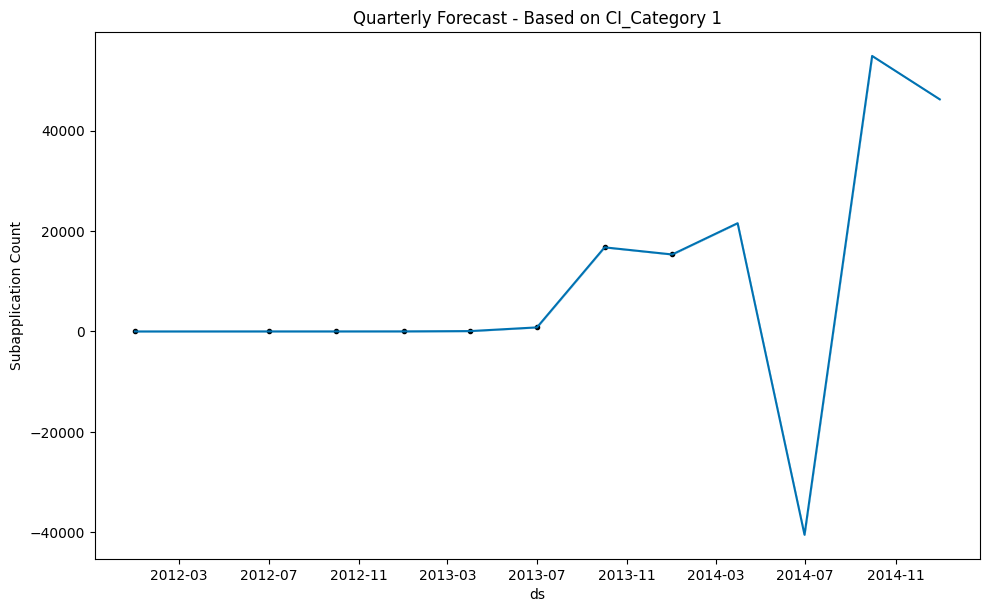

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/9gre_eli.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/xsilxe7v.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=28304', 'data', 'file=/tmp/tmpa2eb3i85/9gre_eli.json', 'init=/tmp/tmpa2eb3i85/xsilxe7v.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_model_gui0b2u/prophet_model-20250828043605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:05 - cmdstanpy - INFO - Chain [1] start processing
IN

------------------------------------------------------
           ds          yhat    yhat_lower    yhat_upper
8  2014-03-31  21563.439931  21563.439522  21563.440355
9  2014-06-30 -40498.265609 -40498.266892 -40498.264294
10 2014-09-30  54878.858631  54878.856048  54878.861266
11 2014-12-31  46236.319501  46236.315460  46236.323743
------------------------------------------------------
-----------------------------------------

📈 Forecasting for CI_Category 2 - Quarterly
-----------------------------------------
          ds  y
0 2013-10-01  5
-----------------------------------------
Skipping CI_Category 2 — not enough data.
-----------------------------------------

📈 Forecasting for CI_Category 3 - Quarterly
-----------------------------------------
          ds     y
0 2013-04-01     1
1 2013-07-01    80
2 2013-10-01  1999
3 2014-01-01  1563
-----------------------------------------


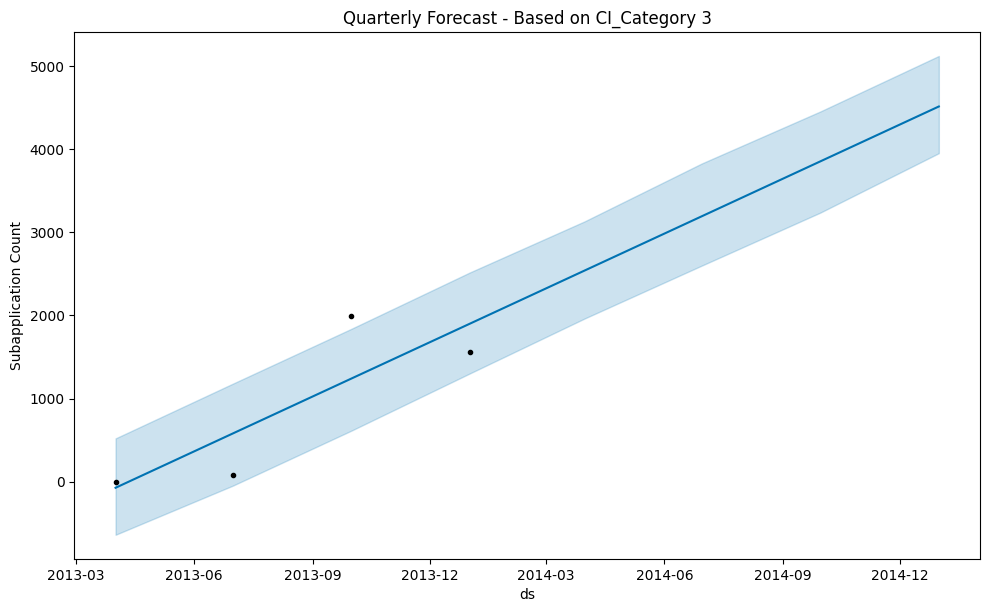

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/6kgya5j5.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/q71anj77.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20421', 'data', 'file=/tmp/tmpa2eb3i85/6kgya5j5.json', 'init=/tmp/tmpa2eb3i85/q71anj77.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modeleg1zbwht/prophet_model-20250828043605.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:05 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds         yhat   yhat_lower   yhat_upper
4 2014-03-31  2539.759902  1962.271843  3131.807924
5 2014-06-30  3193.244498  2599.484228  3828.944084
6 2014-09-30  3853.910244  3237.148029  4454.709874
7 2014-12-31  4514.575990  3952.620956  5122.919485
------------------------------------------------------
-----------------------------------------

📈 Forecasting for CI_Category 4 - Quarterly
-----------------------------------------
          ds    y
0 2013-07-01    4
1 2013-10-01   49
2 2014-01-01  161
-----------------------------------------
Skipping CI_Category 4 — not enough data.
-----------------------------------------

📈 Forecasting for CI_Category 5 - Quarterly
-----------------------------------------
          ds    y
0 2013-07-01    3
1 2013-10-01  117
2 2014-01-01   92
-----------------------------------------
Skipping CI_Category 5 — not enough data.
-----------------------------------------

📈 Forecasting for

04:36:05 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


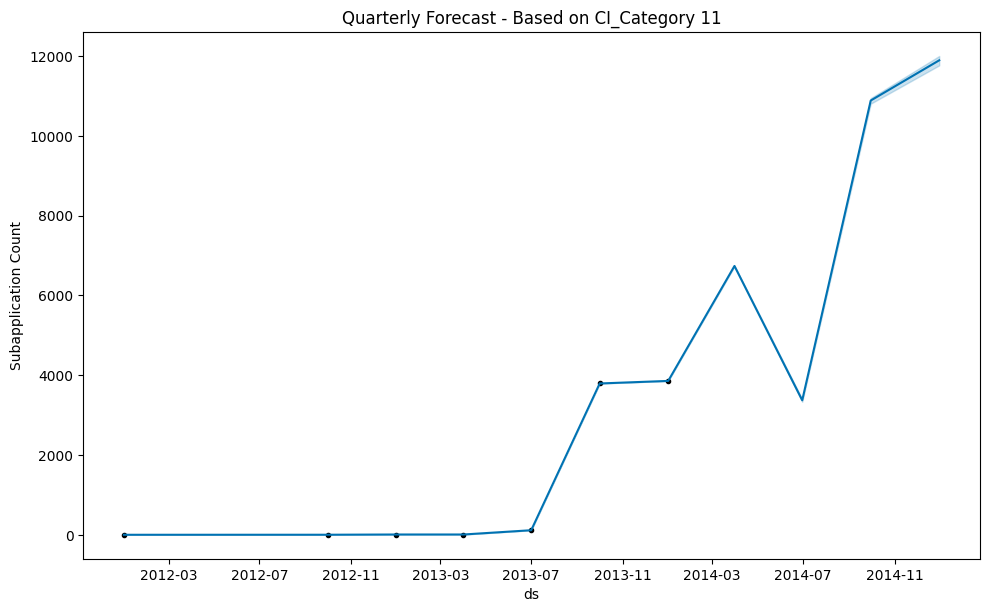

------------------------------------------------------
           ds          yhat    yhat_lower    yhat_upper
7  2014-03-31   6735.946266   6725.074349   6745.391356
8  2014-06-30   3370.824665   3332.233139   3403.407916
9  2014-09-30  10881.113045  10801.840211  10942.231950
10 2014-12-31  11888.629757  11761.568123  11998.065709
------------------------------------------------------


In [ ]:
for cat in sorted(unique_priorities):
    print("-----------------------------------------")
    print(f"\n📈 Forecasting for CI_Category {cat} - Quarterly")
    print("-----------------------------------------")
    # Filter data for this Priority
    df_cat = df[df_ts['CI_Cat'] == cat]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("-----------------------------------------")


    if len(grouped) < 4:
        print(f"Skipping CI_Category {cat} — not enough data.")
        continue

    model = Prophet()
    model.fit(grouped)

    # Forecast next 4 quarters
    future = model.make_future_dataframe(periods=4, freq='Q')
    cat_forecast = model.predict(future)

    model.plot(cat_forecast)
    plt.title(f'Quarterly Forecast - Based on CI_Category {cat}')
    plt.ylabel('Subapplication Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(cat_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

Category - 1,3 & 11 have the forecasting result. Though other categories have skipped due to less number of data.

Category 1 --> Application Department

Category 3 --> Computer Department

Category 11 --> Sub-Application Department

Forecasting the incident volume of the feature CI_Cat - Annually

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/w5e43j15.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/vru9ufry.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88851', 'data', 'file=/tmp/tmpa2eb3i85/w5e43j15.json', 'init=/tmp/tmpa2eb3i85/vru9ufry.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_model1gcg4q0e/prophet_model-20250828043606.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:06 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


-----------------------------------------

📈 Forecasting for CI_Category 0 - Annually
-----------------------------------------
          ds  y
0 2013-10-01  1
1 2014-01-01  1
-----------------------------------------
Skipping CI_Category 0 — not enough data.
-----------------------------------------

📈 Forecasting for CI_Category 1 - Annually
-----------------------------------------
          ds      y
0 2012-01-01      2
1 2012-07-01      8
2 2012-10-01      8
3 2013-01-01     16
4 2013-04-01     73
5 2013-07-01    811
6 2013-10-01  16754
7 2014-01-01  15338
-----------------------------------------


04:36:06 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


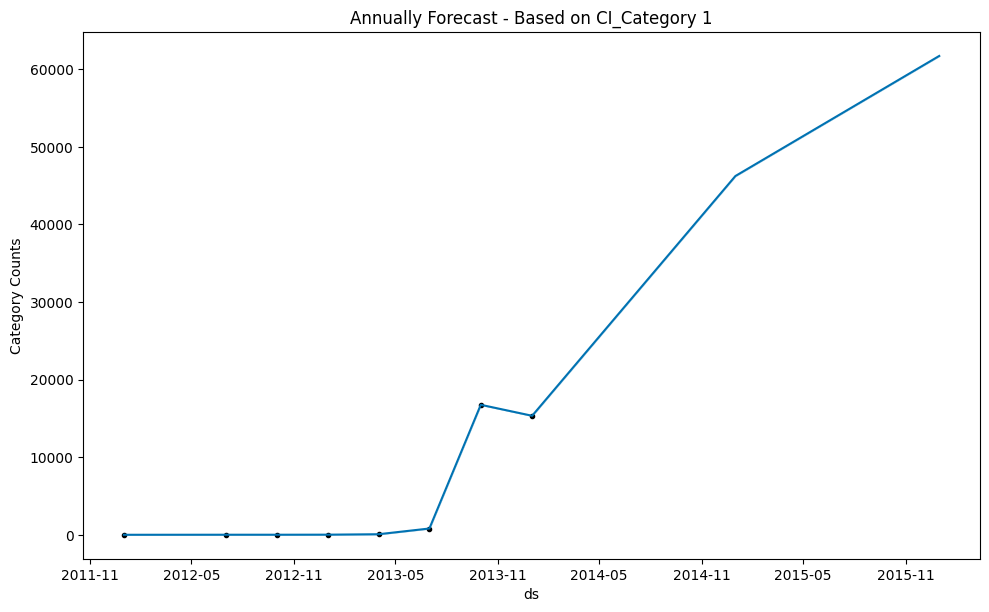

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 2.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/uof_4ms9.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/blmqnc2a.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=27974', 'data', 'file=/tmp/tmpa2eb3i85/uof_4ms9.json', 'init=/tmp/tmpa2eb3i85/blmqnc2a.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modellb9weyup/prophet_model-20250828043606.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:06 - cmdstanpy - INFO - Chain [1] start processing
IN

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2013-10-01  16754.200972  16754.200970  16754.200974
7 2014-01-01  15337.892629  15337.892626  15337.892631
8 2014-12-31  46236.319501  46236.317289  46236.321691
9 2015-12-31  61710.853222  61710.846348  61710.860084
------------------------------------------------------
-----------------------------------------

📈 Forecasting for CI_Category 2 - Annually
-----------------------------------------
          ds  y
0 2013-10-01  5
-----------------------------------------
Skipping CI_Category 2 — not enough data.
-----------------------------------------

📈 Forecasting for CI_Category 3 - Annually
-----------------------------------------
          ds     y
0 2013-04-01     1
1 2013-07-01    80
2 2013-10-01  1999
3 2014-01-01  1563
-----------------------------------------


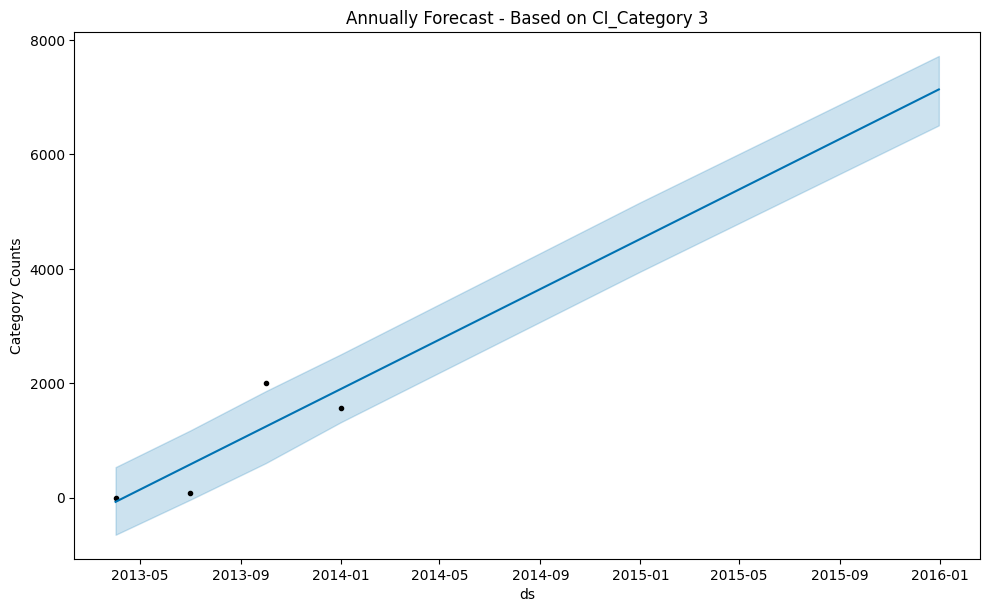

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/tas73hnt.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/n19iq2gn.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=60891', 'data', 'file=/tmp/tmpa2eb3i85/tas73hnt.json', 'init=/tmp/tmpa2eb3i85/n19iq2gn.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelr7xra0_y/prophet_model-20250828043607.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds         yhat   yhat_lower   yhat_upper
2 2013-10-01  1239.971859   601.419058  1859.892812
3 2014-01-01  1900.637604  1319.753547  2507.373472
4 2014-12-31  4514.575990  3944.547020  5156.546203
5 2015-12-31  7135.695524  6507.281024  7721.132902
------------------------------------------------------
-----------------------------------------

📈 Forecasting for CI_Category 4 - Annually
-----------------------------------------
          ds    y
0 2013-07-01    4
1 2013-10-01   49
2 2014-01-01  161
-----------------------------------------
Skipping CI_Category 4 — not enough data.
-----------------------------------------

📈 Forecasting for CI_Category 5 - Annually
-----------------------------------------
          ds    y
0 2013-07-01    3
1 2013-10-01  117
2 2014-01-01   92
-----------------------------------------
Skipping CI_Category 5 — not enough data.
-----------------------------------------

📈 Forecasting for C

04:36:07 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


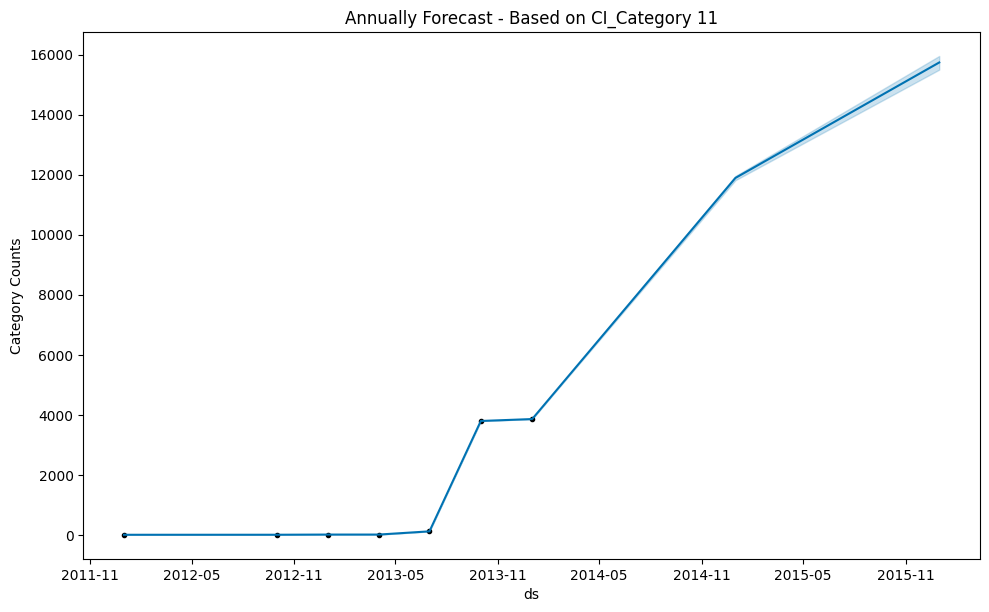

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
5 2013-10-01   3792.005209   3792.005209   3792.005210
6 2014-01-01   3856.018311   3856.018310   3856.018312
7 2014-12-31  11888.629757  11813.167441  11954.638358
8 2015-12-31  15734.427891  15495.266510  15952.169573
------------------------------------------------------


In [ ]:
for cat in sorted(unique_priorities):
    print("-----------------------------------------")
    print(f"\n📈 Forecasting for CI_Category {cat} - Annually")
    print("-----------------------------------------")
    # Filter data for this Priority
    df_cat = df[df_ts['CI_Cat'] == cat]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("-----------------------------------------")


    if len(grouped) < 4:
        print(f"Skipping CI_Category {cat} — not enough data.")
        continue

    model = Prophet()
    model.fit(grouped)

    # Forecast next 2 Years
    future = model.make_future_dataframe(periods=2, freq='Y')
    cat_forecast = model.predict(future)

    model.plot(cat_forecast)
    plt.title(f'Annually Forecast - Based on CI_Category {cat}')
    plt.ylabel('Category Counts')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(cat_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

Category - 1,3 & 11 have the forecasting result. Though other categories have skipped due to less number of data.

Category 1 --> Application Department

Category 3 --> Computer Department

Category 11 --> Sub-Application Department

Forecasting the incident volume of the feature Impact - Quarterly

In [ ]:
df_ts['Impact'].unique()

array([4, 3, 1, 5, 2])

In [ ]:
imp_priorities = df_ts['Impact'].unique()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/w5zlgqse.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/8wl4fddt.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=61261', 'data', 'file=/tmp/tmpa2eb3i85/w5zlgqse.json', 'init=/tmp/tmpa2eb3i85/8wl4fddt.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelcvl0qzs8/prophet_model-20250828043607.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:07 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------

📈 Forecasting for Impact 1 - Quarterly
------------------------------------------------------
          ds    y
0 2012-01-01    1
1 2012-07-01    1
2 2013-04-01    1
3 2013-07-01   33
4 2013-10-01  681
5 2014-01-01  666
------------------------------------------------------


04:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


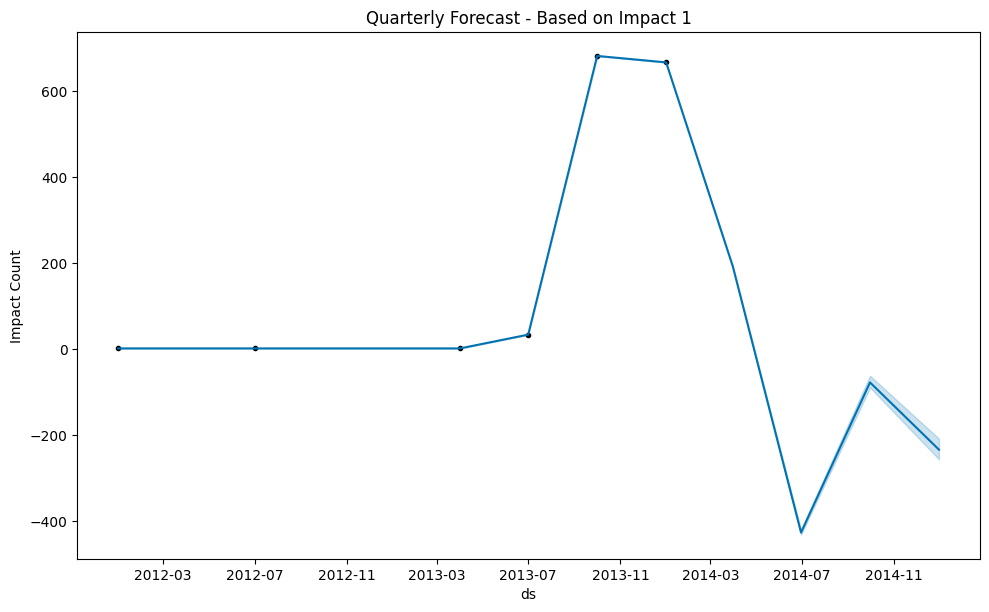

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/dys0t5sy.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/71jyxhhj.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=26790', 'data', 'file=/tmp/tmpa2eb3i85/dys0t5sy.json', 'init=/tmp/tmpa2eb3i85/71jyxhhj.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelszdw4gzu/prophet_model-20250828043608.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
04:36:08 - cmdstanpy - INFO - Chain [1] done processing
INFO:c

------------------------------------------------------
          ds        yhat  yhat_lower  yhat_upper
6 2014-03-31  191.408415  190.110754  193.090885
7 2014-06-30 -427.112316 -432.347395 -419.940386
8 2014-09-30  -78.105770  -90.191528  -62.546924
9 2014-12-31 -234.375087 -256.797375 -208.752612
------------------------------------------------------
------------------------------------------------------

📈 Forecasting for Impact 2 - Quarterly
------------------------------------------------------
          ds    y
0 2013-07-01    1
1 2013-10-01  438
2 2014-01-01  253
------------------------------------------------------
Skipping Impact 2 — not enough data.
------------------------------------------------------

📈 Forecasting for Impact 3 - Quarterly
------------------------------------------------------
          ds     y
0 2012-01-01     1
1 2012-10-01     2
2 2013-01-01     2
3 2013-04-01    13
4 2013-07-01    82
5 2013-10-01  2597
6 2014-01-01  2537
-----------------------------

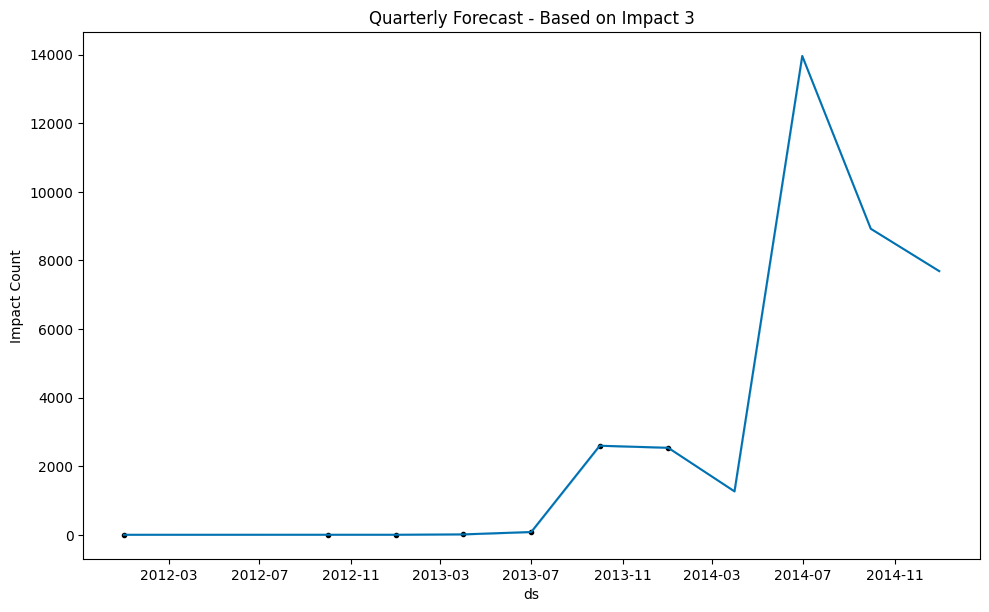

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/hrva0xxd.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/3dkyq3na.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=80274', 'data', 'file=/tmp/tmpa2eb3i85/hrva0xxd.json', 'init=/tmp/tmpa2eb3i85/3dkyq3na.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelubkpd2gr/prophet_model-20250828043608.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:08 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
           ds          yhat    yhat_lower    yhat_upper
7  2014-03-31   1266.540797   1266.540794   1266.540799
8  2014-06-30  13958.942604  13958.942597  13958.942611
9  2014-09-30   8922.449541   8922.449526   8922.449555
10 2014-12-31   7686.768380   7686.768356   7686.768403
------------------------------------------------------
------------------------------------------------------

📈 Forecasting for Impact 4 - Quarterly
------------------------------------------------------
          ds      y
0 2012-01-01      1
1 2012-07-01      7
2 2012-10-01      7
3 2013-01-01     16
4 2013-04-01     48
5 2013-07-01    459
6 2013-10-01  10902
7 2014-01-01  11116
------------------------------------------------------


04:36:09 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


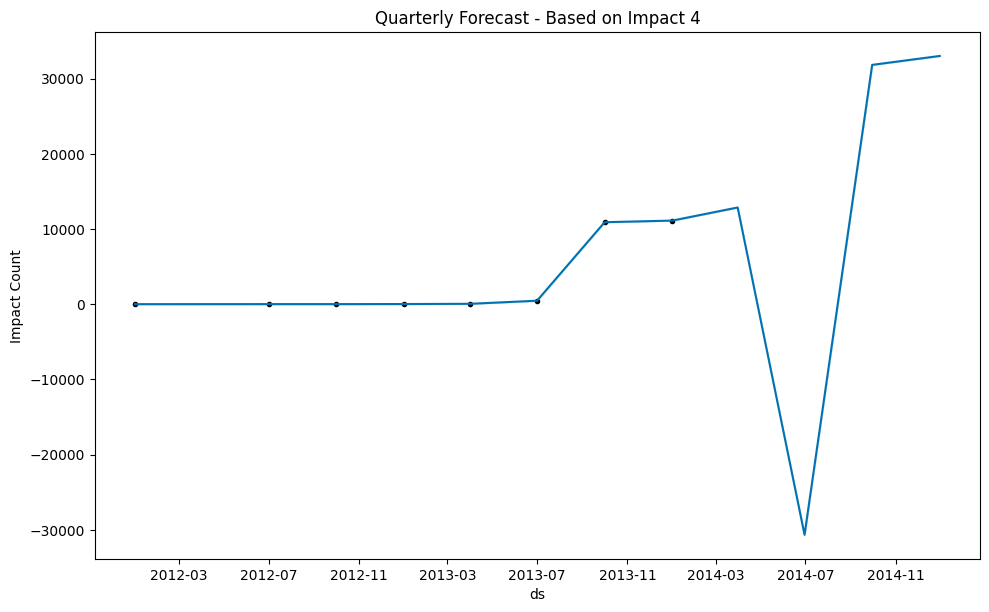

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/axaljxp_.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/jqflhwqv.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=19641', 'data', 'file=/tmp/tmpa2eb3i85/axaljxp_.json', 'init=/tmp/tmpa2eb3i85/jqflhwqv.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelaoejyoj7/prophet_model-20250828043609.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:09 - cmdstanpy - INFO - Chain [1] start processing
IN

------------------------------------------------------
           ds          yhat    yhat_lower    yhat_upper
8  2014-03-31  12859.795046  12859.795031  12859.795062
9  2014-06-30 -30672.878431 -30672.878467 -30672.878393
10 2014-09-30  31826.746010  31826.745939  31826.746078
11 2014-12-31  33013.504893  33013.504783  33013.505006
------------------------------------------------------
------------------------------------------------------

📈 Forecasting for Impact 5 - Quarterly
------------------------------------------------------
          ds     y
0 2012-10-01     1
1 2013-01-01     6
2 2013-04-01    20
3 2013-07-01   448
4 2013-10-01  8859
5 2014-01-01  7406
------------------------------------------------------


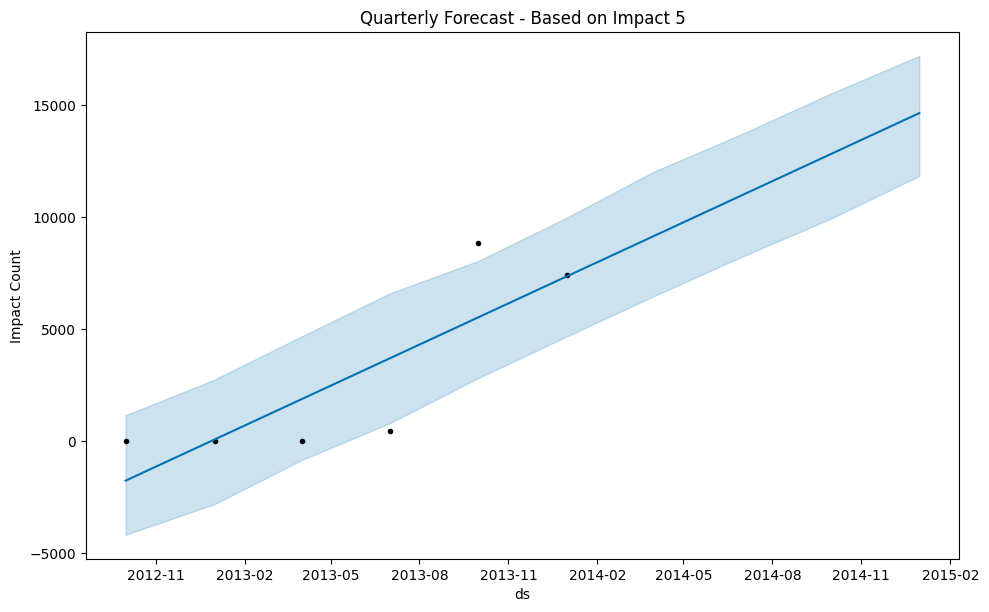

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2014-03-31   9142.804415   6458.343322  12019.692379
7 2014-06-30  10961.482872   8220.209077  13695.806004
8 2014-09-30  12800.146808   9917.301239  15505.699723
9 2014-12-31  14638.810743  11833.072781  17189.573686
------------------------------------------------------


In [ ]:
for imp in sorted(imp_priorities):
    print("------------------------------------------------------")
    print(f"\n📈 Forecasting for Impact {imp} - Quarterly")
    print("------------------------------------------------------")

    # Filter data for this Priority
    df_cat = df[df_ts['Impact'] == imp]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("------------------------------------------------------")

    if len(grouped) < 5:
        print(f"Skipping Impact {imp} — not enough data.")
        continue

    # Model Build
    model = Prophet()
    model.fit(grouped)

    # Forecast next 4 quarters
    future = model.make_future_dataframe(periods=4, freq='Q')
    imp_forecast = model.predict(future)

    model.plot(imp_forecast)
    plt.title(f'Quarterly Forecast - Based on Impact {imp}')
    plt.ylabel('Impact Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(imp_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

Impact - 1,3,4 & 5 have the forecasting result. Though Impact-2 have skipped due to less number of data.

Forecasting the incident volume of the feature Impact - Annually

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/iazl6q_7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/uvp9gmge.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=97205', 'data', 'file=/tmp/tmpa2eb3i85/iazl6q_7.json', 'init=/tmp/tmpa2eb3i85/uvp9gmge.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_model2fs5_6za/prophet_model-20250828043610.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:10 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------

📈 Forecasting for Impact 1 - Annually
------------------------------------------------------
          ds    y
0 2012-01-01    1
1 2012-07-01    1
2 2013-04-01    1
3 2013-07-01   33
4 2013-10-01  681
5 2014-01-01  666
------------------------------------------------------


04:36:10 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


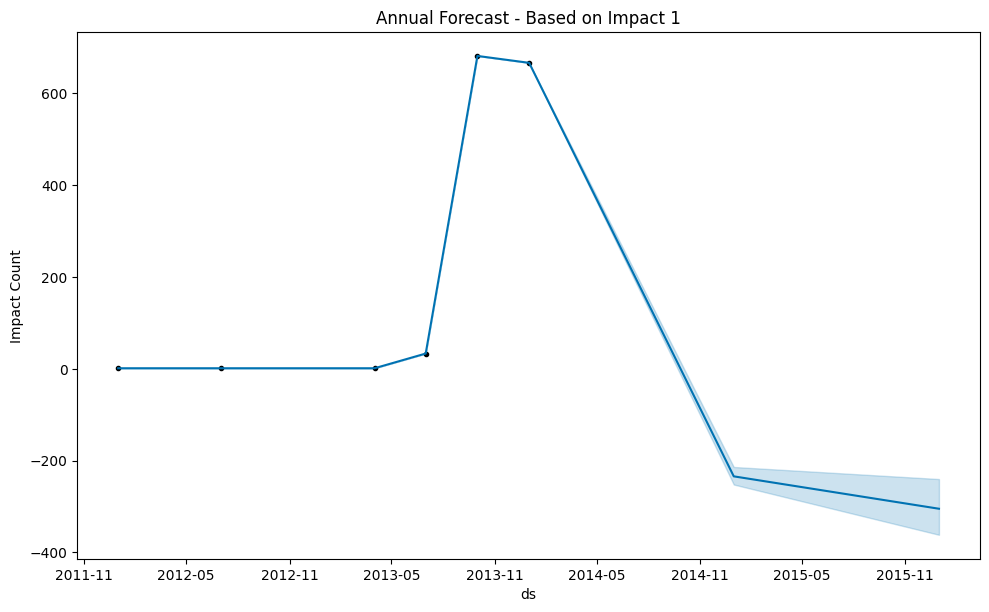

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 4.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/rf48ifge.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/qi064qiw.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=22085', 'data', 'file=/tmp/tmpa2eb3i85/rf48ifge.json', 'init=/tmp/tmpa2eb3i85/qi064qiw.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modeljrond4mc/prophet_model-20250828043611.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds        yhat  yhat_lower  yhat_upper
4 2013-10-01  681.009031  681.009031  681.009032
5 2014-01-01  665.995653  665.995653  665.995653
6 2014-12-31 -234.375087 -252.173235 -213.951437
7 2015-12-31 -304.906438 -361.600194 -240.239775
------------------------------------------------------
------------------------------------------------------

📈 Forecasting for Impact 2 - Annually
------------------------------------------------------
          ds    y
0 2013-07-01    1
1 2013-10-01  438
2 2014-01-01  253
------------------------------------------------------
Skipping Impact 2 — not enough data.
------------------------------------------------------

📈 Forecasting for Impact 3 - Annually
------------------------------------------------------
          ds     y
0 2012-01-01     1
1 2012-10-01     2
2 2013-01-01     2
3 2013-04-01    13
4 2013-07-01    82
5 2013-10-01  2597
6 2014-01-01  2537
-------------------------------

04:36:11 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


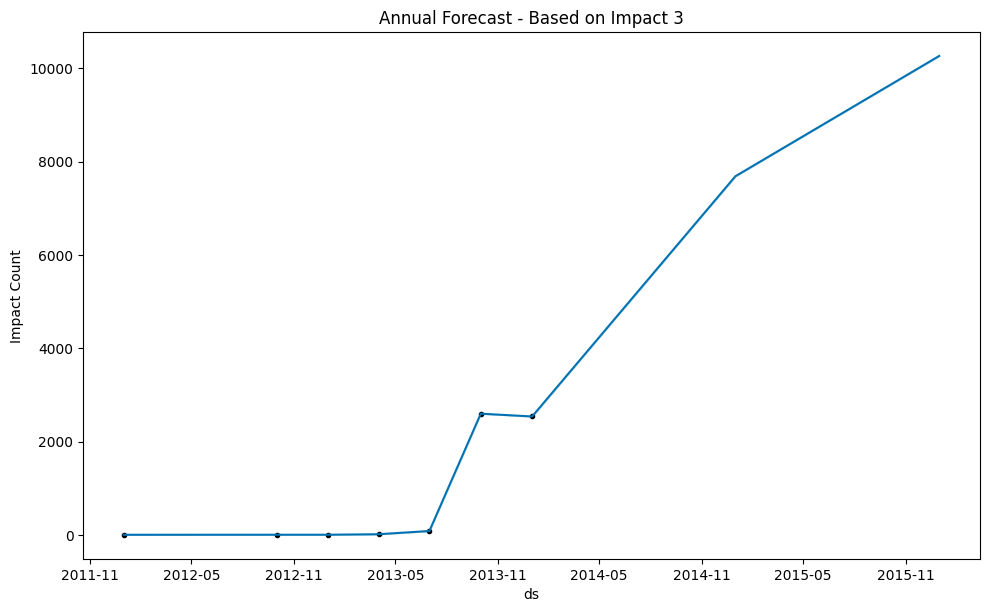

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/crcwioka.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/nnb0w1w7.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87713', 'data', 'file=/tmp/tmpa2eb3i85/crcwioka.json', 'init=/tmp/tmpa2eb3i85/nnb0w1w7.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelvihpst99/prophet_model-20250828043611.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:11 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
5 2013-10-01   2597.014096   2597.014095   2597.014097
6 2014-01-01   2536.978155   2536.978154   2536.978156
7 2014-12-31   7686.768380   7686.768366   7686.768392
8 2015-12-31  10265.482416  10265.482369  10265.482459
------------------------------------------------------
------------------------------------------------------

📈 Forecasting for Impact 4 - Annually
------------------------------------------------------
          ds      y
0 2012-01-01      1
1 2012-07-01      7
2 2012-10-01      7
3 2013-01-01     16
4 2013-04-01     48
5 2013-07-01    459
6 2013-10-01  10902
7 2014-01-01  11116
------------------------------------------------------


04:36:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


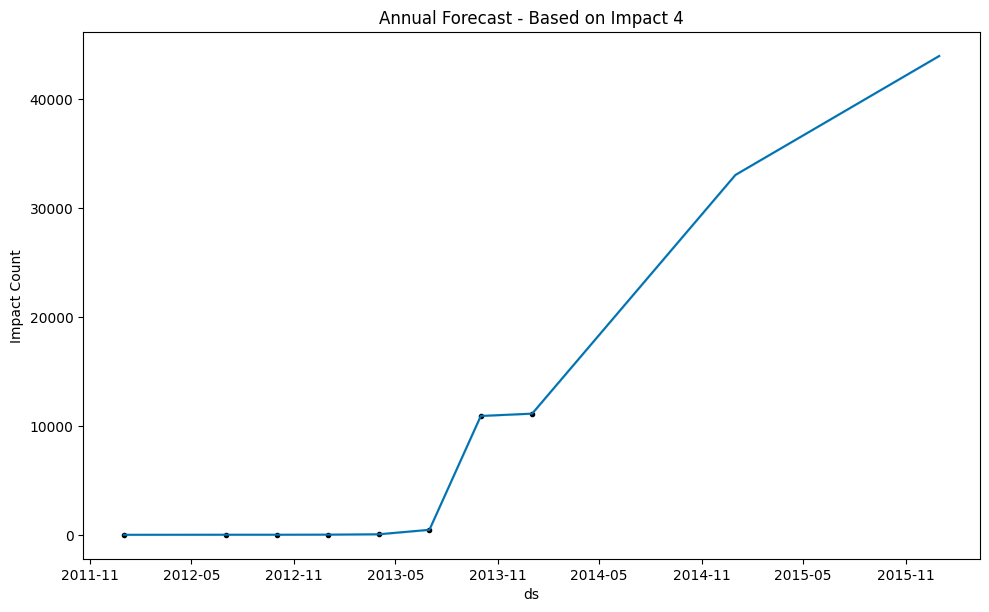

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/7njsast4.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/9ol9j_2b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=64316', 'data', 'file=/tmp/tmpa2eb3i85/7njsast4.json', 'init=/tmp/tmpa2eb3i85/9ol9j_2b.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelzyx5ukaa/prophet_model-20250828043612.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:12 - cmdstanpy - INFO - Chain [1] start processing
IN

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2013-10-01  10902.049945  10902.049935  10902.049954
7 2014-01-01  11115.944331  11115.944321  11115.944342
8 2014-12-31  33013.504893  33013.504833  33013.504954
9 2015-12-31  43927.185624  43927.185427  43927.185810
------------------------------------------------------
------------------------------------------------------

📈 Forecasting for Impact 5 - Annually
------------------------------------------------------
          ds     y
0 2012-10-01     1
1 2013-01-01     6
2 2013-04-01    20
3 2013-07-01   448
4 2013-10-01  8859
5 2014-01-01  7406
------------------------------------------------------


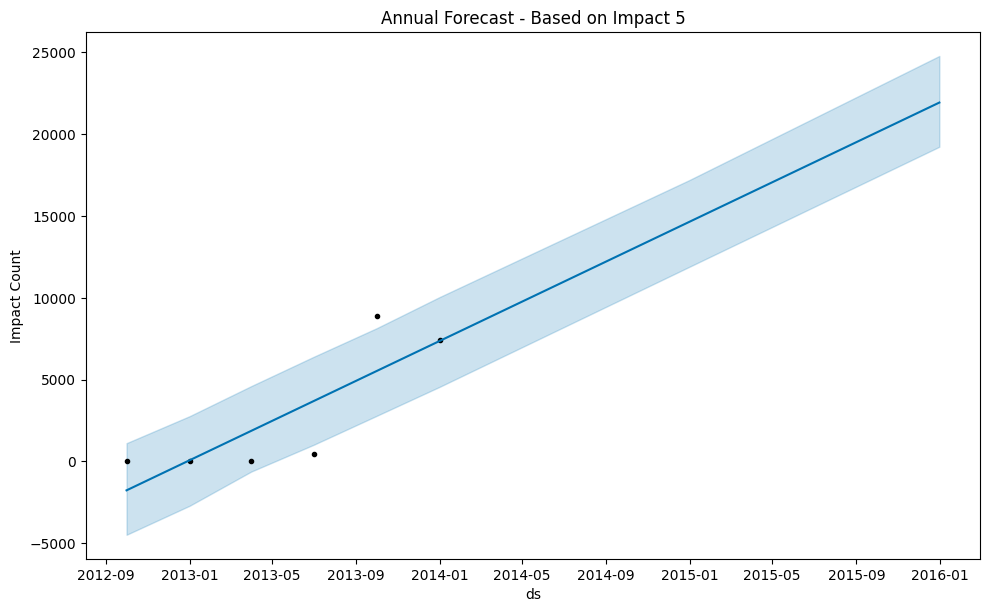

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
4 2013-10-01   5525.432977   2784.412677   8141.682874
5 2014-01-01   7364.096912   4559.707547  10048.237444
6 2014-12-31  14638.810743  11889.184292  17192.350908
7 2015-12-31  21933.510051  19231.116291  24782.851298
------------------------------------------------------


In [ ]:
for imp in sorted(imp_priorities):
    print("------------------------------------------------------")
    print(f"\n📈 Forecasting for Impact {imp} - Annually")
    print("------------------------------------------------------")

    # Filter data for this Priority
    df_cat = df[df_ts['Impact'] == imp]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("------------------------------------------------------")

    if len(grouped) < 5:
        print(f"Skipping Impact {imp} — not enough data.")
        continue

    # Model Build
    model = Prophet()
    model.fit(grouped)

    # Forecast next 2 Years
    future = model.make_future_dataframe(periods=2, freq='Y')
    imp_forecast = model.predict(future)

    model.plot(imp_forecast)
    plt.title(f'Annual Forecast - Based on Impact {imp}')
    plt.ylabel('Impact Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(imp_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

Impact - 1,3,4 & 5 have the forecasting result. Though Impact-2 have skipped due to less number of data.

Forecasting the incident volume of the feature Urgency - Quarterly

In [ ]:
df_ts['Urgency'].unique()

array([4, 3, 5, 2, 1])

In [ ]:
urge_priorities = df_ts['Urgency'].unique()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/0grqcxoz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/5mtx2f0b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=94031', 'data', 'file=/tmp/tmpa2eb3i85/0grqcxoz.json', 'init=/tmp/tmpa2eb3i85/5mtx2f0b.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_model711xjips/prophet_model-20250828043612.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:12 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


-----------------------------------------

📈 Forecasting for Urgency 1 - Quarterly
-----------------------------------------
          ds  y
0 2014-01-01  6
-----------------------------------------
Skipping Urgency 1 — not enough data.
-----------------------------------------

📈 Forecasting for Urgency 2 - Quarterly
-----------------------------------------
          ds    y
0 2013-07-01    2
1 2013-10-01  439
2 2014-01-01  255
-----------------------------------------
Skipping Urgency 2 — not enough data.
-----------------------------------------

📈 Forecasting for Urgency 3 - Quarterly
-----------------------------------------
          ds     y
0 2012-01-01     2
1 2012-07-01     1
2 2012-10-01     2
3 2013-01-01     2
4 2013-04-01    14
5 2013-07-01   109
6 2013-10-01  3227
7 2014-01-01  3179
-----------------------------------------


04:36:12 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


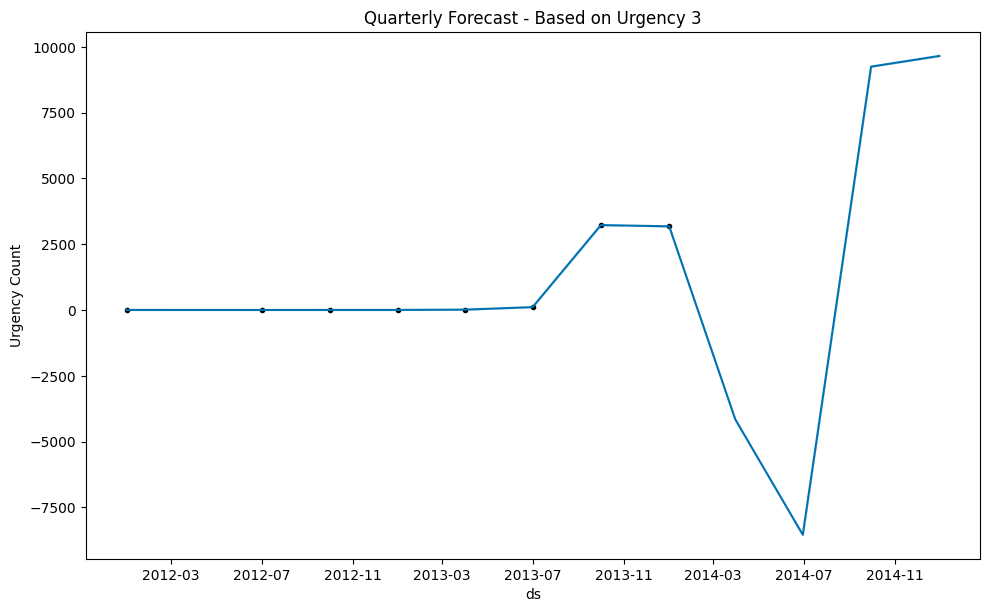

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/0_yu1n95.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/x69bdl7n.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=53075', 'data', 'file=/tmp/tmpa2eb3i85/0_yu1n95.json', 'init=/tmp/tmpa2eb3i85/x69bdl7n.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelr_nar9as/prophet_model-20250828043613.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:13 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
           ds         yhat   yhat_lower   yhat_upper
8  2014-03-31 -4153.437589 -4153.437594 -4153.437585
9  2014-06-30 -8542.292067 -8542.292083 -8542.292054
10 2014-09-30  9248.066599  9248.066569  9248.066626
11 2014-12-31  9653.675638  9653.675589  9653.675679
------------------------------------------------------
-----------------------------------------

📈 Forecasting for Urgency 4 - Quarterly
-----------------------------------------
          ds      y
0 2012-01-01      1
1 2012-07-01      7
2 2012-10-01      7
3 2013-01-01     16
4 2013-04-01     46
5 2013-07-01    459
6 2013-10-01  10894
7 2014-01-01  11158
-----------------------------------------


04:36:16 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


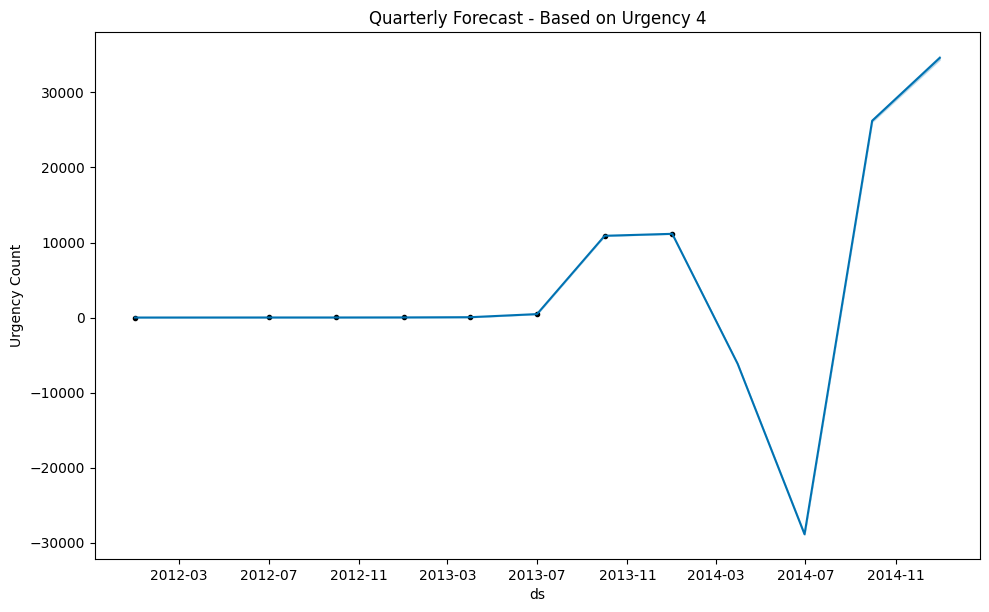

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/72nq247k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/2aof6764.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51441', 'data', 'file=/tmp/tmpa2eb3i85/72nq247k.json', 'init=/tmp/tmpa2eb3i85/2aof6764.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modellkfqyxz9/prophet_model-20250828043617.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:17 - cmdstanpy - INFO - Chain [1] start processing
IN

------------------------------------------------------
           ds          yhat    yhat_lower    yhat_upper
8  2014-03-31  -6169.822757  -6191.457800  -6144.223667
9  2014-06-30 -28882.378685 -28952.563220 -28798.378180
10 2014-09-30  26224.507127  26079.545872  26383.688230
11 2014-12-31  34608.142291  34369.897409  34864.419928
------------------------------------------------------
-----------------------------------------

📈 Forecasting for Urgency 5 - Quarterly
-----------------------------------------
          ds     y
0 2012-10-01     1
1 2013-01-01     6
2 2013-04-01    22
3 2013-07-01   453
4 2013-10-01  8917
5 2014-01-01  7380
-----------------------------------------


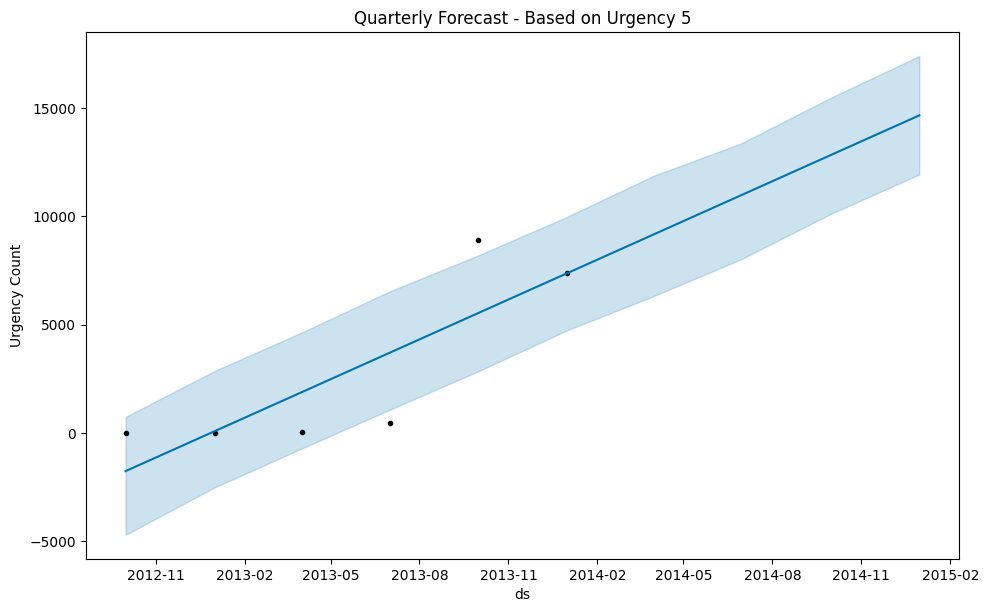

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2014-03-31   9153.943075   6306.207494  11862.139993
7 2014-06-30  10973.928133   8017.601326  13367.018903
8 2014-09-30  12813.913026  10095.246881  15457.245138
9 2014-12-31  14653.897919  11926.317415  17396.701250
------------------------------------------------------


In [ ]:
for urge in sorted(urge_priorities):
    print("-----------------------------------------")
    print(f"\n📈 Forecasting for Urgency {urge} - Quarterly")
    print("-----------------------------------------")
    # Filter data for this Priority
    df_cat = df[df_ts['Urgency'] == urge]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("-----------------------------------------")


    if len(grouped) < 5:
        print(f"Skipping Urgency {urge} — not enough data.")
        continue

    model = Prophet()
    model.fit(grouped)

    # Forecast next 4 quarters
    future = model.make_future_dataframe(periods=4, freq='Q')
    u_forecast = model.predict(future)

    model.plot(u_forecast)
    plt.title(f'Quarterly Forecast - Based on Urgency {urge}')
    plt.ylabel('Urgency Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(u_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

Urgency - 3,4 & 5 have the forecasting result. Though Urgency - 1 & 2 have skipped due to less number of data.

Forecasting the incident volume of the feature Urgency - Annually

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/lr85m92g.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/bpcd0u3h.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=51660', 'data', 'file=/tmp/tmpa2eb3i85/lr85m92g.json', 'init=/tmp/tmpa2eb3i85/bpcd0u3h.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelmbbfjzsd/prophet_model-20250828043617.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


-----------------------------------------

📈 Forecasting for Urgency 1 - Annually
-----------------------------------------
          ds  y
0 2014-01-01  6
-----------------------------------------
Skipping Urgency 1 — not enough data.
-----------------------------------------

📈 Forecasting for Urgency 2 - Annually
-----------------------------------------
          ds    y
0 2013-07-01    2
1 2013-10-01  439
2 2014-01-01  255
-----------------------------------------
Skipping Urgency 2 — not enough data.
-----------------------------------------

📈 Forecasting for Urgency 3 - Annually
-----------------------------------------
          ds     y
0 2012-01-01     2
1 2012-07-01     1
2 2012-10-01     2
3 2013-01-01     2
4 2013-04-01    14
5 2013-07-01   109
6 2013-10-01  3227
7 2014-01-01  3179
-----------------------------------------


04:36:17 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


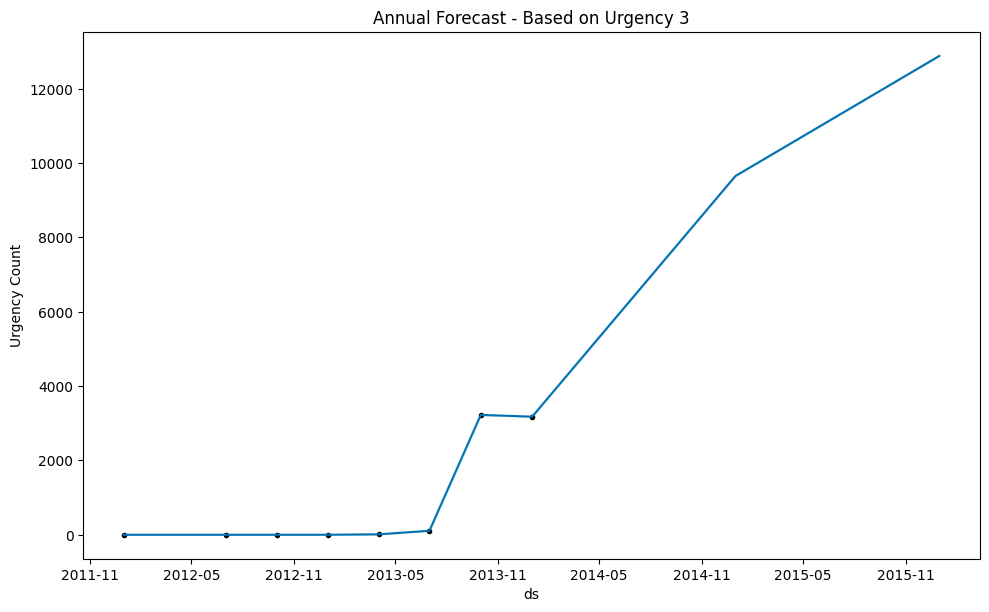

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/be36mdba.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/mmm_ufz2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=88114', 'data', 'file=/tmp/tmpa2eb3i85/be36mdba.json', 'init=/tmp/tmpa2eb3i85/mmm_ufz2.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_model5owvr3nt/prophet_model-20250828043617.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:17 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2013-10-01   3227.018770   3227.018768   3227.018772
7 2014-01-01   3179.020926   3179.020924   3179.020928
8 2014-12-31   9653.675638   9653.675613   9653.675660
9 2015-12-31  12883.857639  12883.857559  12883.857716
------------------------------------------------------
-----------------------------------------

📈 Forecasting for Urgency 4 - Annually
-----------------------------------------
          ds      y
0 2012-01-01      1
1 2012-07-01      7
2 2012-10-01      7
3 2013-01-01     16
4 2013-04-01     46
5 2013-07-01    459
6 2013-10-01  10894
7 2014-01-01  11158
-----------------------------------------


04:36:21 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


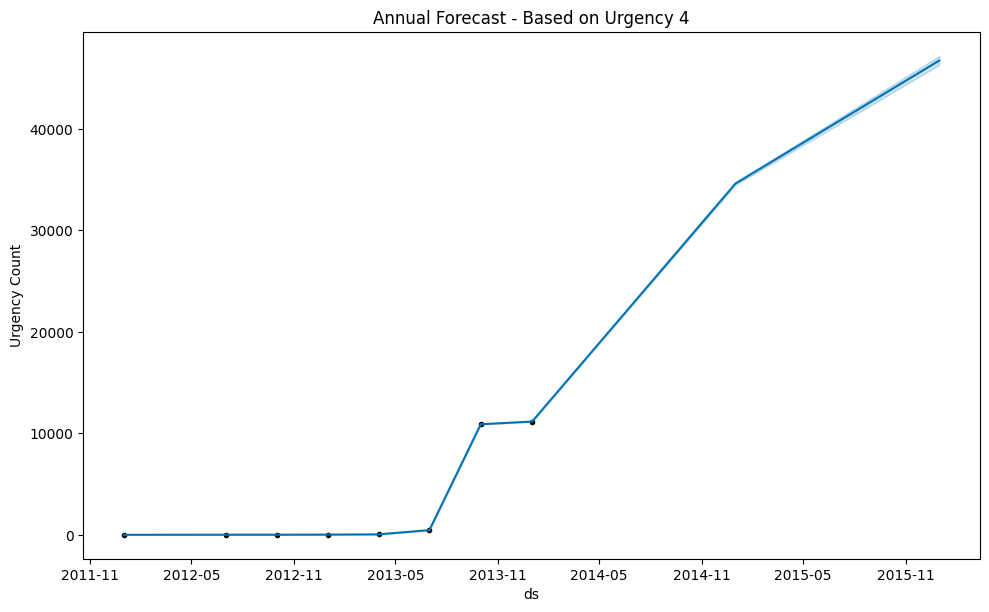

INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/xl8sl7lz.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/j1_xpwjb.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=15115', 'data', 'file=/tmp/tmpa2eb3i85/xl8sl7lz.json', 'init=/tmp/tmpa2eb3i85/j1_xpwjb.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelud3xi44z/prophet_model-20250828043622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:22 - cmdstanpy - INFO - Chain [1] start processing
IN

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2013-10-01  10894.405901  10894.405901  10894.405901
7 2014-01-01  11157.962845  11157.962845  11157.962845
8 2014-12-31  34608.142291  34468.681843  34745.747007
9 2015-12-31  46733.025247  46297.905368  47187.997000
------------------------------------------------------
-----------------------------------------

📈 Forecasting for Urgency 5 - Annually
-----------------------------------------
          ds     y
0 2012-10-01     1
1 2013-01-01     6
2 2013-04-01    22
3 2013-07-01   453
4 2013-10-01  8917
5 2014-01-01  7380
-----------------------------------------


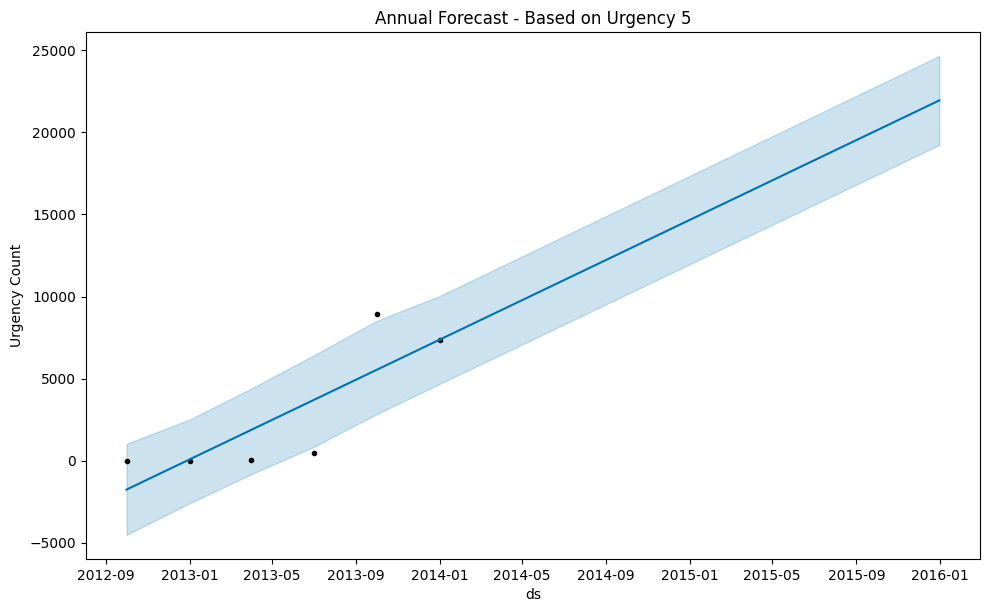

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
4 2013-10-01   5533.972797   2837.741219   8517.536224
5 2014-01-01   7373.957690   4677.506624  10036.482319
6 2014-12-31  14653.897919  11954.883521  17335.351490
7 2015-12-31  21953.837983  19241.028656  24662.362059
------------------------------------------------------


In [ ]:
for urge in sorted(urge_priorities):
    print("-----------------------------------------")
    print(f"\n📈 Forecasting for Urgency {urge} - Annually")
    print("-----------------------------------------")
    # Filter data for this Priority
    df_cat = df[df_ts['Urgency'] == urge]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("-----------------------------------------")


    if len(grouped) < 5:
        print(f"Skipping Urgency {urge} — not enough data.")
        continue

    model = Prophet()
    model.fit(grouped)

    # Forecast next 2 Years
    future = model.make_future_dataframe(periods=2, freq='Y')
    u_forecast = model.predict(future)

    model.plot(u_forecast)
    plt.title(f'Annual Forecast - Based on Urgency {urge}')
    plt.ylabel('Urgency Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(u_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

Urgency - 3,4 & 5 have the forecasting result. Though Urgency - 1 & 2 have skipped due to less number of data.

Forecasting the incident volume of the Priority - Quarterly

In [ ]:
df_ts['Priority_Status'].unique()

array([1, 0])

In [ ]:
df_ts['Priority_Status'].value_counts()

,count
Priority_Status,
1,44525
0,2080


Priority_Status

Low -->	44525

High -->	2080

In [ ]:
prior_priorities = df_ts['Priority_Status'].unique()

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/mzzkfbfr.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/rrxcxwk2.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=5784', 'data', 'file=/tmp/tmpa2eb3i85/mzzkfbfr.json', 'init=/tmp/tmpa2eb3i85/rrxcxwk2.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_model2he9d6qy/prophet_model-20250828043622.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:22 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


-----------------------------------------

📈 Forecasting for Priority 0 - Quarterly
-----------------------------------------
          ds     y
0 2012-01-01     1
1 2012-07-01     1
2 2013-04-01     1
3 2013-07-01    34
4 2013-10-01  1122
5 2014-01-01   921
-----------------------------------------


04:36:22 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


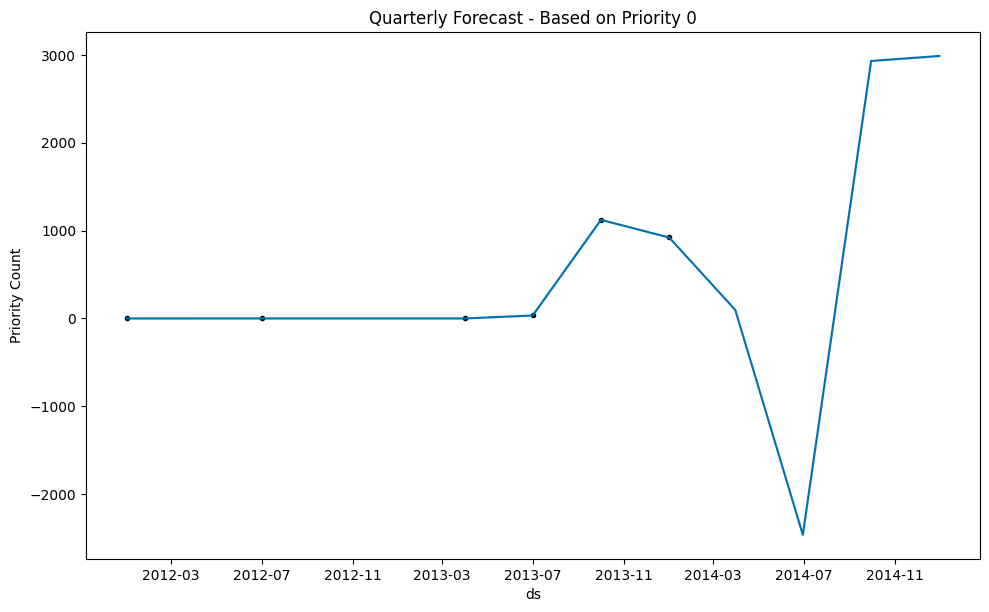

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/t_jepba7.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/_8bwe_pk.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=87778', 'data', 'file=/tmp/tmpa2eb3i85/t_jepba7.json', 'init=/tmp/tmpa2eb3i85/_8bwe_pk.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelaz8q3rgo/prophet_model-20250828043623.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:23 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds         yhat   yhat_lower   yhat_upper
6 2014-03-31    97.077023    97.077020    97.077026
7 2014-06-30 -2459.876148 -2459.876160 -2459.876138
8 2014-09-30  2928.779873  2928.779847  2928.779896
9 2014-12-31  2985.723413  2985.723374  2985.723450
------------------------------------------------------
-----------------------------------------

📈 Forecasting for Priority 1 - Quarterly
-----------------------------------------
          ds      y
0 2012-01-01      2
1 2012-07-01      7
2 2012-10-01     10
3 2013-01-01     24
4 2013-04-01     81
5 2013-07-01    989
6 2013-10-01  22355
7 2014-01-01  21057
-----------------------------------------


04:36:23 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


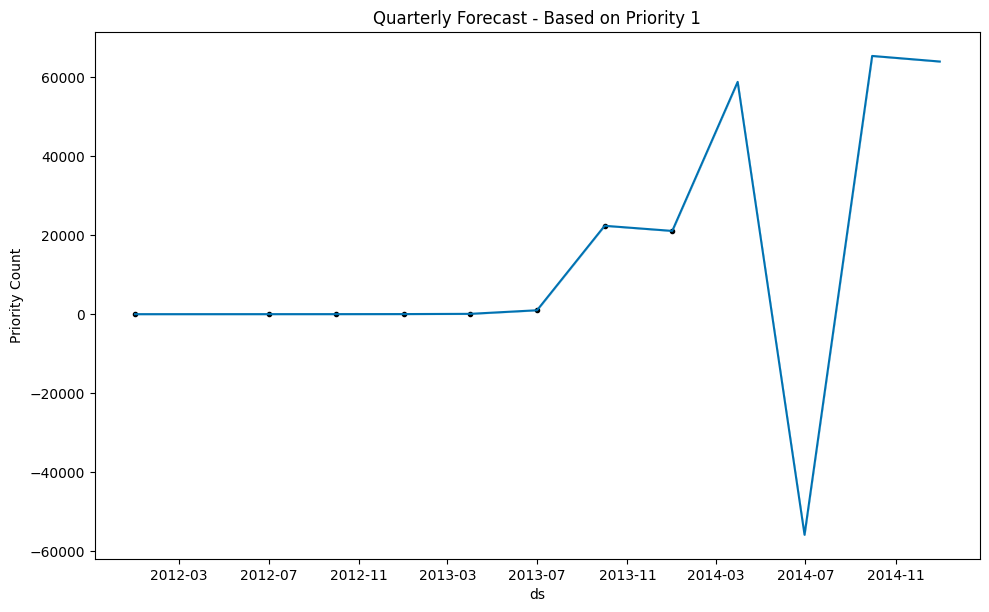

------------------------------------------------------
           ds          yhat    yhat_lower    yhat_upper
8  2014-03-31  58751.079008  58751.074109  58751.084095
9  2014-06-30 -55798.594482 -55798.609953 -55798.578528
10 2014-09-30  65310.816508  65310.787621  65310.848587
11 2014-12-31  63899.775486  63899.728790  63899.825072
------------------------------------------------------


In [ ]:
for ps in sorted(prior_priorities):
    print("-----------------------------------------")
    print(f"\n📈 Forecasting for Priority {ps} - Quarterly")
    print("-----------------------------------------")
    # Filter data for this Priority
    df_cat = df[df_ts['Priority_Status'] == ps]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("-----------------------------------------")

    model = Prophet()
    model.fit(grouped)

    # Forecast next 4 quarters
    future = model.make_future_dataframe(periods=4, freq='Q')
    p_forecast = model.predict(future)

    model.plot(p_forecast)
    plt.title(f'Quarterly Forecast - Based on Priority {ps}')
    plt.ylabel('Priority Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(p_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

The above Quarterly Forecast Prediction results shows that Low Priority Ticket counts will be about 3K by the end of 2014 and similarly High Priority Ticket counts will be around 6.5K.

Forecasting the incident volume of the feature Priority  - Annually

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 3.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/2tfpiwlv.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/reza7sn_.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=17381', 'data', 'file=/tmp/tmpa2eb3i85/2tfpiwlv.json', 'init=/tmp/tmpa2eb3i85/reza7sn_.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelf3bplq4s/prophet_model-20250828043624.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


-----------------------------------------

📈 Forecasting for Priority 0 - Annually
-----------------------------------------
          ds     y
0 2012-01-01     1
1 2012-07-01     1
2 2013-04-01     1
3 2013-07-01    34
4 2013-10-01  1122
5 2014-01-01   921
-----------------------------------------


04:36:24 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


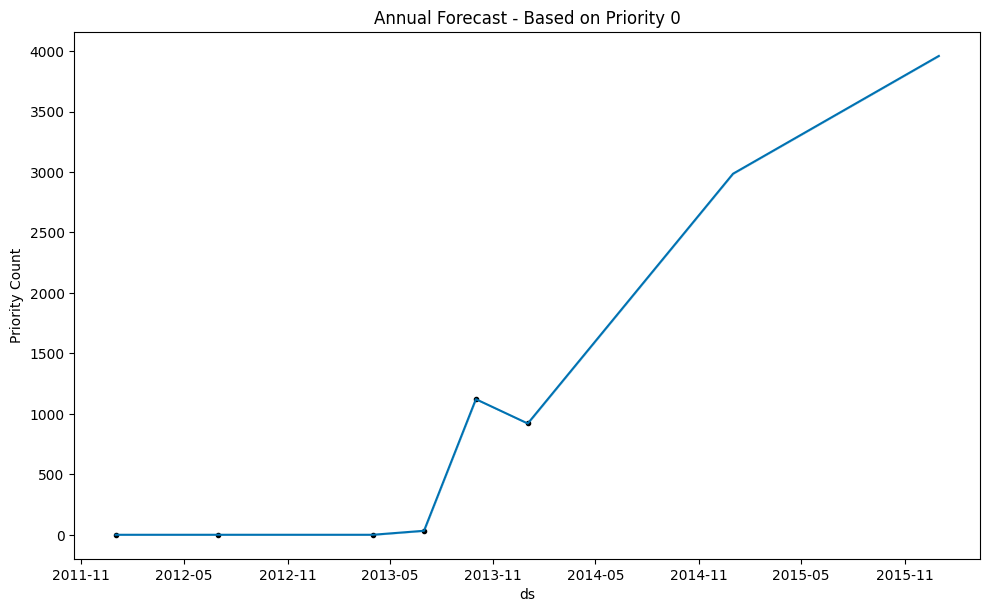

INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
INFO:prophet:n_changepoints greater than number of observations. Using 5.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/wthym0by.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpa2eb3i85/nlv04c8p.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.12/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=20500', 'data', 'file=/tmp/tmpa2eb3i85/wthym0by.json', 'init=/tmp/tmpa2eb3i85/nlv04c8p.json', 'output', 'file=/tmp/tmpa2eb3i85/prophet_modelkwvhnmq9/prophet_model-20250828043624.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
04:36:24 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing


------------------------------------------------------
          ds         yhat   yhat_lower   yhat_upper
4 2013-10-01  1121.994730  1121.994729  1121.994731
5 2014-01-01   920.951227   920.951226   920.951228
6 2014-12-31  2985.723413  2985.723385  2985.723442
7 2015-12-31  3959.400295  3959.400208  3959.400388
------------------------------------------------------
-----------------------------------------

📈 Forecasting for Priority 1 - Annually
-----------------------------------------
          ds      y
0 2012-01-01      2
1 2012-07-01      7
2 2012-10-01     10
3 2013-01-01     24
4 2013-04-01     81
5 2013-07-01    989
6 2013-10-01  22355
7 2014-01-01  21057
-----------------------------------------


04:36:25 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing


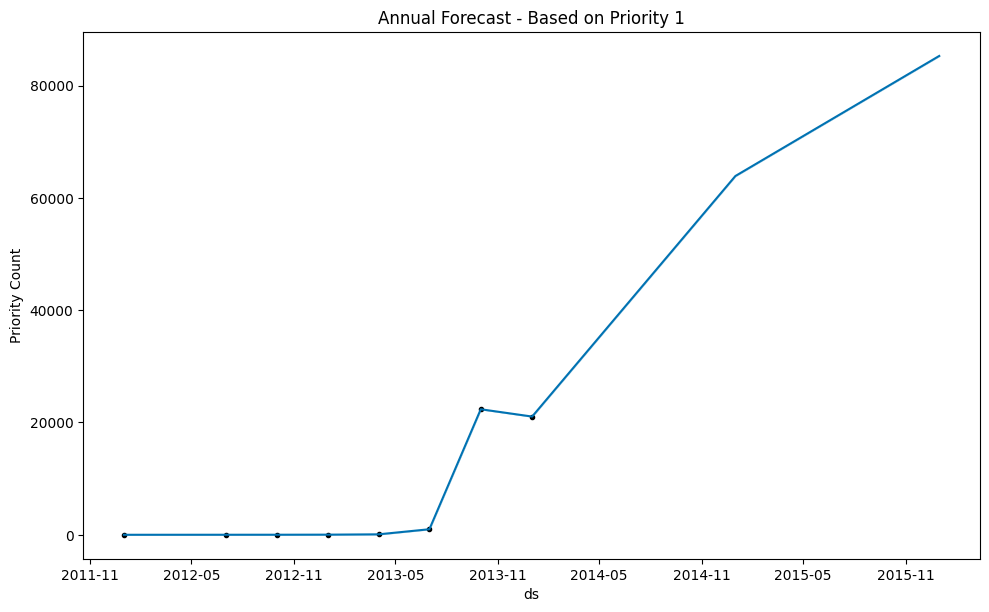

------------------------------------------------------
          ds          yhat    yhat_lower    yhat_upper
6 2013-10-01  22355.076133  22355.076130  22355.076135
7 2014-01-01  21056.555082  21056.555079  21056.555085
8 2014-12-31  63899.775486  63899.747799  63899.802294
9 2015-12-31  85282.124767  85282.036934  85282.212218
------------------------------------------------------


In [ ]:
for ps in sorted(prior_priorities):
    print("-----------------------------------------")
    print(f"\n📈 Forecasting for Priority {ps} - Annually")
    print("-----------------------------------------")
    # Filter data for this Priority
    df_cat = df[df_ts['Priority_Status'] == ps]

    # Aggregate by Quarter
    grouped = df_cat.groupby(df_ts['Open_Time'].dt.to_period('Q')).size().reset_index(name='y')
    grouped['ds'] = grouped['Open_Time'].dt.to_timestamp()
    grouped = grouped[['ds', 'y']]
    print(grouped)
    print("-----------------------------------------")

    model = Prophet()
    model.fit(grouped)

    # Forecast next 2 Years
    future = model.make_future_dataframe(periods=2, freq='Y')
    p_forecast = model.predict(future)

    model.plot(p_forecast)
    plt.title(f'Annual Forecast - Based on Priority {ps}')
    plt.ylabel('Priority Count')
    plt.grid()
    plt.show()

    print("------------------------------------------------------")
    print(p_forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(4))
    print("------------------------------------------------------")

The above Annual Forecast Prediction results shows that Low Priority Ticket counts will be about 4K by the end of 2015 and similarly High Priority Ticket counts will be around 8.5K.

# 3. Auto tag the tickets with right priorities and right departments.

Auto-Tag Ticket Priorities

Build 2 Models

One for priotity and another for Category

In [ ]:
# Deriving a new feature
df['Resolution_Time_Hrs'] = (df['Close_Time'] - df['Open_Time']).dt.total_seconds() / 3600

In [ ]:
# Extract Year, Month, weekday and day from Open_Time
df['Open_Year'] = df['Open_Time'].dt.year
df['Open_Month'] = df['Open_Time'].dt.month
df['Open_Weekday'] = df['Open_Time'].dt.weekday
df['Open_Day'] = df['Open_Time'].dt.day

In [ ]:
df.tail()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day
46601,1,4,4,4,0.231896,1,0,2014-03-31 16:23:00,NaT,2014-03-31 16:29:00,2014-03-31 16:29:00,6,1,1,0.100000,2014,3,0,31
46602,1,4,4,4,0.805153,1,0,2014-03-31 15:03:00,NaT,2014-03-31 15:29:00,2014-03-31 15:29:00,12,1,1,0.433333,2014,3,0,31
46603,3,5,5,5,0.917466,1,0,2014-03-31 15:28:00,NaT,2014-03-31 15:32:00,2014-03-31 15:32:00,1,1,1,0.066667,2014,3,0,31
46604,1,4,4,4,0.701278,1,0,2014-03-31 15:35:00,NaT,2014-03-31 15:42:00,2014-03-31 15:42:00,10,1,1,0.116667,2014,3,0,31
46605,6,3,3,3,0.902320,1,0,2014-03-31 17:24:00,NaT,2014-03-31 22:47:00,2014-03-31 22:47:00,1,1,1,5.383333,2014,3,0,31


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 19 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   CI_Cat                      46605 non-null  int64         
 1   Impact                      46605 non-null  int64         
 2   Urgency                     46605 non-null  int64         
 3   Priority                    46605 non-null  int64         
 4   number_cnt                  46605 non-null  float64       
 5   Category                    46605 non-null  int64         
 6   No_of_Reassignments         46605 non-null  int64         
 7   Open_Time                   46605 non-null  datetime64[ns]
 8   Reopen_Time                 2284 non-null   datetime64[ns]
 9   Resolved_Time               44825 non-null  datetime64[ns]
 10  Close_Time                  46605 non-null  datetime64[ns]
 11  Closure_Code                46605 non-null  int64         


In [ ]:
df_autotag = df.copy()

In [ ]:
df_autotag = df_autotag.drop(columns=['Open_Time','Reopen_Time','Resolved_Time','Close_Time'],axis=1)

In [ ]:
df_autotag.info()

<class 'pandas.core.frame.DataFrame'>
Index: 46605 entries, 0 to 46605
Data columns (total 15 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   CI_Cat                      46605 non-null  int64  
 1   Impact                      46605 non-null  int64  
 2   Urgency                     46605 non-null  int64  
 3   Priority                    46605 non-null  int64  
 4   number_cnt                  46605 non-null  float64
 5   Category                    46605 non-null  int64  
 6   No_of_Reassignments         46605 non-null  int64  
 7   Closure_Code                46605 non-null  int64  
 8   No_of_Related_Interactions  46605 non-null  int64  
 9   Priority_Status             46605 non-null  int64  
 10  Resolution_Time_Hrs         46605 non-null  float64
 11  Open_Year                   46605 non-null  int32  
 12  Open_Month                  46605 non-null  int32  
 13  Open_Weekday                46605 no

In [ ]:
df_autotag['Open_Day'] = df_autotag['Open_Day'].astype('int64')
df_autotag['Open_Month'] = df_autotag['Open_Month'].astype('int64')
df_autotag['Open_Weekday'] = df_autotag['Open_Weekday'].astype('int64')
df_autotag['Open_Year'] = df_autotag['Open_Year'].astype('int64')

In [ ]:
df_autotag['Priority'].value_counts()

,count
Priority,
4,22717
5,16485
3,5323
1,1383
2,697


In [ ]:
X = df_autotag.drop(columns=['Priority'],axis=1)
y = df_autotag['Priority']

In [ ]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
rfr1 = RandomForestClassifier(max_depth=10, min_samples_leaf=1, min_samples_split=2)
rfr1.fit(X_train,y_train)

RandomForestClassifier(max_depth=10)

In [ ]:
y_pred = rfr1.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

0.9997854307477738

In [ ]:
confusion_matrix(y_test,y_pred)

array([[ 269,    0,    0,    0,    0],
       [   0,  165,    0,    0,    0],
       [   0,    0, 1050,    2,    0],
       [   0,    0,    0, 4563,    0],
       [   0,    0,    0,    0, 3272]])

In [ ]:
prediction = pd.DataFrame({'Actual':y_test,'Predicted':y_pred})
prediction.sample(10)

,Actual,Predicted
26159,5,5
37023,5,5
36257,4,4
3563,5,5
38599,4,4
6234,4,4
42447,5,5
210,4,4
45664,3,3
44668,5,5


Model for Category

In [ ]:
df_autotag['CI_Cat'].value_counts()

,count
CI_Cat,
1,33010
11,7782
3,3643
10,703
6,442
9,333
4,214
5,212
8,152


application 	33010

subapplication 	7782

computer 	3643

storage 	703

hardware 	442

software 	333

database 	214

displaydevice 	212

officeelectronics 	152

networkcomponents 	107

applicationcomponent 	5

Phone 	2

In [ ]:
cat_x = df_autotag.drop(columns=['CI_Cat'],axis=1)
cat_y = df_autotag['CI_Cat']

In [ ]:
ip_train,ip_test,op_train,op_test = train_test_split(cat_x,cat_y,test_size=0.2,random_state=42)

In [ ]:
rfr2 = RandomForestClassifier()
rfr2.fit(ip_train,op_train)

RandomForestClassifier()

In [ ]:
y_pred2 = rfr2.predict(ip_test)

In [ ]:
accuracy_score(op_test,y_pred2)

0.7508850981654329

In [ ]:
confusion_matrix(op_test,y_pred2)

array([[6230,    0,   77,    6,    9,    2,    0,    1,    2,   17,  283],
       [   2,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0],
       [ 351,    0,  338,    0,    3,    2,    0,    0,    0,    2,   14],
       [  30,    0,    0,    4,    0,    0,    0,    0,    0,    0,    1],
       [  13,    0,    2,    0,   25,    0,    0,    0,    0,    0,    0],
       [  40,    0,   18,    0,    0,   20,    1,    0,    0,   10,    0],
       [  19,    0,    2,    0,    0,    1,    1,    0,    0,    0,    0],
       [  29,    0,    0,    0,    1,    0,    0,    1,    0,    1,    1],
       [  64,    0,    1,    0,    0,    0,    0,    0,    0,    0,    1],
       [  90,    0,    3,    0,    0,    9,    0,    0,    0,   38,    2],
       [1197,    0,    9,    1,    1,    1,    0,    0,    0,    3,  342]])

In [ ]:
op_test.value_counts()

,count
CI_Cat,
1,6627
11,1554
3,710
10,142
6,89
9,66
5,40
4,35
8,33


In [ ]:
prediction2 = pd.DataFrame({'Actual':op_test,'Predicted':y_pred2})
prediction2.iloc[100:110]

,Actual,Predicted
45489,1,1
1422,1,1
501,1,1
41070,1,1
17395,1,1
10508,1,1
31228,9,1
4579,1,11
21315,1,1
40507,11,11


In [ ]:
ip_test[:5]

,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day
25585,5,5,5,0.335345,3,2,6,1,1,16.250000,2014,1,0,6
3402,4,4,4,0.585551,1,0,10,1,1,7.266667,2013,10,1,8
33903,4,4,4,0.793937,1,0,0,1,1,0.250000,2014,2,2,5
22216,5,5,5,0.983211,1,1,10,1,1,233.633333,2013,12,1,17
10407,4,5,4,0.761728,1,0,6,1,1,2.483333,2013,11,0,4


In [ ]:
op_test[:5]

,CI_Cat
25585,1
3402,1
33903,1
22216,1
10407,1


In [ ]:
def tagging(a,b):
  if a == 1 or a == 2 and b == 1:
    return "High Priority Ticket from Application Department"
  elif a == 1 or a == 2 and b == 3:
    return "High Priority Ticket from Computer Department"
  elif a == 1 or a == 2 and b == 4:
    return "High Priority Ticket from Database Department"
  elif a == 1 or a == 2 and b == 5:
    return "High Priority Ticket from Display Device Department"
  elif a == 1 or a == 2 and b == 6:
    return "High Priority Ticket from Hardware Department"
  elif a == 1 or a == 2 and b == 7:
    return "High Priority Ticket from Network Component Department"
  elif a == 1 or a == 2 and b == 8:
    return "High Priority Ticket from Office Electronics Department"
  elif a == 1 or a == 2 and b == 10:
    return "High Priority Ticket from Storage Department"
  elif a == 1 or a == 2 and b == 11:
    return "High Priority Ticket from Sub-Application Department"
  elif a == 3 or a == 4 or a == 5 and b == 1:
    return "Low Priority Ticket from Application Department"
  elif a == 3 or a == 4 or a == 5 and b == 3:
    return "Low Priority Ticket from Computer Department"
  elif a == 3 or a == 4 or a == 5 and b == 4:
    return "Low Priority Ticket from Database Department"
  elif a == 3 or a == 4 or a == 5 and b == 5:
    return "Low Priority Ticket from Display Department"
  elif a == 3 or a == 4 or a == 5 and b == 6:
    return "Low Priority Ticket from Hardware Department"
  elif a == 3 or a == 4 or a == 5 and b == 7:
    return "Low Priority Ticket from Network Component Department"
  elif a == 3 or a == 4 or a == 5 and b == 8:
    return "Low Priority Ticket from Office Electronics Department"
  elif a == 3 or a == 4 or a == 5 and b == 10:
    return "Low Priority Ticket from Storage Department"
  elif a == 3 or a == 4 or a == 5 and b == 11:
    return "Low Priority Ticket from Sub-Application Department"
  else:
    return "Ticket with Low Priority belongs to other departments"

In [ ]:
tag_1 = rfr1.predict([[1,5,5,0.335345,3,2,6,1,1,16.250000,2014,1,0,6]])
tag_1

array([5])

In [ ]:
tag_2 = rfr2.predict([[5,5,5,0.335345,3,2,6,1,1,16.250000,2014,1,0,6]])
tag_2

array([1])

In [ ]:
tagging(tag_1,tag_2)

'Low Priority Ticket from Application Department'

There are 2 Models were built, one for predicting the Priority of Tickets and another one is to predict the right department to assign those Tickets.

The first model performs well in Training, Testing and Evaluation metrics. Though the second model performance is not upto the expected level though the data is not equally distributed to all departments, almost 80% of data belongs to one particular department and only remaining 10 to 15 has been distributed to 2 or 3 departments, whereas about 5 departments are left without required data.  

# 4. Predict RFC (Request for change) and possible failure.

Predict RFC - Request For Change

Based upon large number of reassignmnets and long duration of Open time and close time.

In [ ]:
df.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day
0,11,4,4,4,0.601292,1,26,2012-02-05 13:32:00,NaT,2013-11-04 13:50:00,2013-11-04 13:51:00,6,1,1,15312.316667,2012,2,6,5
1,1,3,3,3,0.415050,1,33,2012-03-12 15:44:00,2013-12-02 12:31:00,2013-12-02 12:36:00,2013-12-02 12:36:00,10,1,1,15116.866667,2012,3,0,12
2,1,1,3,1,0.517551,3,3,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,2014-01-13 15:13:00,4,1,0,15722.616667,2012,3,3,29
3,1,4,4,4,0.642927,1,13,2012-07-17 11:49:00,NaT,2013-11-14 09:31:00,2013-11-14 09:31:00,5,1,1,11637.700000,2012,7,1,17
4,1,4,4,4,0.345258,1,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,2013-11-08 13:55:00,6,1,1,10922.900000,2012,8,4,10


In [ ]:
df.describe()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,Close_Time,Closure_Code,No_of_Related_Interactions,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day
count,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605,2284,44825,46605,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000,46605.000000
mean,3.135093,4.128162,4.189529,4.120566,0.499664,1.379358,1.131831,2013-12-24 09:47:10.689410816,2013-12-21 09:21:54.772329216,2013-12-29 15:34:08.827663104,2013-12-29 12:55:18.818152704,7.071816,1.149533,0.955370,123.135591,2013.471130,6.609398,1.878060,15.724901
min,0.000000,1.000000,1.000000,1.000000,0.000023,0.000000,0.000000,2012-02-05 13:32:00,2013-04-10 09:15:00,2013-10-01 06:45:00,2013-10-01 06:45:00,0.000000,1.000000,0.000000,0.000000,2012.000000,1.000000,0.000000,1.000000
25%,1.000000,4.000000,4.000000,4.000000,0.248254,1.000000,0.000000,2013-11-07 12:29:00,2013-11-05 12:24:00,2013-11-12 16:01:00,2013-11-12 16:43:00,6.000000,1.000000,1.000000,1.266667,2013.000000,2.000000,1.000000,8.000000
50%,1.000000,4.000000,4.000000,4.000000,0.500296,1.000000,0.000000,2013-12-23 11:29:00,2013-12-17 10:31:00,2013-12-31 10:33:00,2013-12-31 08:42:00,6.000000,1.000000,1.000000,18.400000,2013.000000,10.000000,2.000000,16.000000
75%,3.000000,5.000000,5.000000,5.000000,0.749094,1.000000,2.000000,2014-02-07 15:15:00,2014-02-07 07:55:45,2014-02-12 15:53:00,2014-02-12 14:25:00,10.000000,1.000000,1.000000,95.083333,2014.000000,11.000000,3.000000,23.000000
max,11.000000,5.000000,5.000000,5.000000,0.999997,3.000000,46.000000,2014-03-31 17:24:00,2014-03-31 16:21:00,2014-03-31 22:47:00,2014-03-31 22:47:00,13.000000,370.000000,1.000000,15722.616667,2014.000000,12.000000,6.000000,31.000000
std,3.837327,0.884055,0.724743,0.883351,0.288634,0.784541,2.269774,NaN,NaN,NaN,NaN,3.387723,2.553248,0.206493,452.798819,0.500073,4.531618,1.432635,8.690471


In [ ]:
df['number_cnt'].max()

0.999996786

In [ ]:
df['No_of_Reassignments'].max()

46

In [ ]:
df['number_cnt'].describe()

,number_cnt
count,46605.000000
mean,0.499664
std,0.288634
min,0.000023
25%,0.248254
50%,0.500296
75%,0.749094
max,0.999997


<Axes: xlabel='number_cnt', ylabel='Count'>

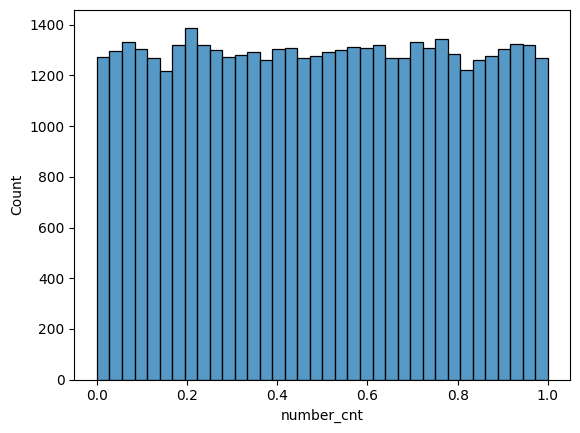

In [ ]:
sns.histplot(x=df['number_cnt'])

<Axes: xlabel='No_of_Reassignments', ylabel='Count'>

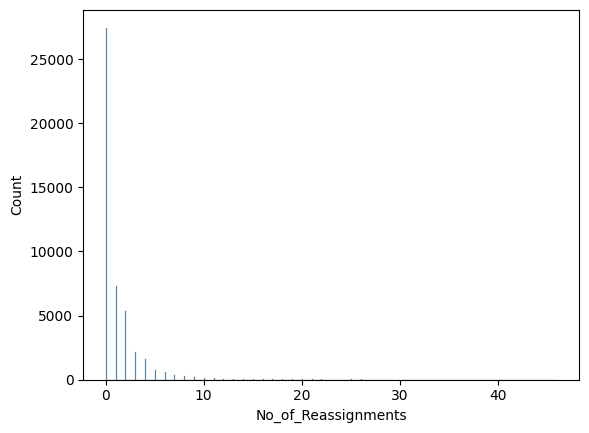

In [ ]:
sns.histplot(x=df['No_of_Reassignments'])

In [ ]:
df['No_of_Reassignments'].describe() # Outliers Identified

,No_of_Reassignments
count,46605.000000
mean,1.131831
std,2.269774
min,0.000000
25%,0.000000
50%,0.000000
75%,2.000000
max,46.000000


In [ ]:
reassign_df = df.copy()

<Axes: xlabel='No_of_Reassignments'>

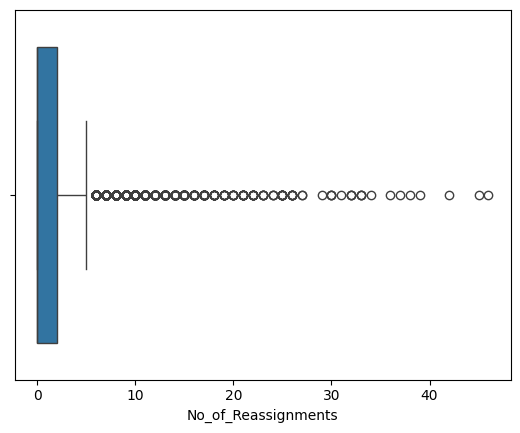

In [ ]:
sns.boxplot(x='No_of_Reassignments',data=reassign_df)

In [ ]:
Q1 = reassign_df['No_of_Reassignments'].quantile(0.25)
Q3 = reassign_df['No_of_Reassignments'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

Q1: 0.0
Q3: 2.0


In [ ]:
IQR = Q3 - Q1
print("IQR:",IQR)

IQR: 2.0


In [ ]:
low_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR
print("Lower limit:",low_bound)
print("Upper limit:",up_bound)

Lower limit: -3.0
Upper limit: 5.0


In [ ]:
reassign_df = reassign_df[(reassign_df['No_of_Reassignments']>low_bound)&(reassign_df['No_of_Reassignments']<=up_bound)]

In [ ]:
reassign_df.shape

(44632, 19)

In [ ]:
reassign_df['Close_Month'] = reassign_df['Close_Time'].dt.month
reassign_df['Close_Weekday'] = reassign_df['Close_Time'].dt.weekday
reassign_df['Close_Day'] = reassign_df['Close_Time'].dt.day

In [ ]:
reassign_df.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,...,No_of_Related_Interactions,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day,Close_Month,Close_Weekday,Close_Day
2,1,1,3,1,0.517551,3,3,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,...,1,0,15722.616667,2012,3,3,29,1,0,13
4,1,4,4,4,0.345258,1,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,...,1,1,10922.900000,2012,8,4,10,11,4,8
5,1,4,4,4,0.006676,1,4,2012-08-10 11:27:00,NaT,2013-11-08 13:54:00,...,1,1,10922.450000,2012,8,4,10,11,4,8
6,1,4,4,4,0.192907,1,2,2012-08-15 14:17:00,NaT,2013-12-27 10:59:00,...,1,1,11972.700000,2012,8,2,15,12,4,27
7,1,4,4,4,0.996468,1,5,2012-08-22 16:31:00,NaT,2013-11-08 14:09:00,...,1,1,10629.633333,2012,8,2,22,11,4,8


In [ ]:
def rfc(a):
    if a>=2:
        return 1
    else:
        return 0
reassign_df['RFC_Status'] = reassign_df['No_of_Reassignments'].apply(rfc)

In [ ]:
reassign_df.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,...,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day,Close_Month,Close_Weekday,Close_Day,RFC_Status
2,1,1,3,1,0.517551,3,3,2012-03-29 12:36:00,NaT,2014-01-13 15:12:00,...,0,15722.616667,2012,3,3,29,1,0,13,1
4,1,4,4,4,0.345258,1,2,2012-08-10 11:01:00,NaT,2013-11-08 13:55:00,...,1,10922.900000,2012,8,4,10,11,4,8,1
5,1,4,4,4,0.006676,1,4,2012-08-10 11:27:00,NaT,2013-11-08 13:54:00,...,1,10922.450000,2012,8,4,10,11,4,8,1
6,1,4,4,4,0.192907,1,2,2012-08-15 14:17:00,NaT,2013-12-27 10:59:00,...,1,11972.700000,2012,8,2,15,12,4,27,1
7,1,4,4,4,0.996468,1,5,2012-08-22 16:31:00,NaT,2013-11-08 14:09:00,...,1,10629.633333,2012,8,2,22,11,4,8,1


In [ ]:
reassign_df['RFC_Status'].value_counts()

,count
RFC_Status,
0,34736
1,9896


0 --> No Request For Change

1 --> Request For Change required

In [ ]:
reassign_df.columns

Index(['CI_Cat', 'Impact', 'Urgency', 'Priority', 'number_cnt', 'Category',
       'No_of_Reassignments', 'Open_Time', 'Reopen_Time', 'Resolved_Time',
       'Close_Time', 'Closure_Code', 'No_of_Related_Interactions',
       'Priority_Status', 'Resolution_Time_Hrs', 'Open_Year', 'Open_Month',
       'Open_Weekday', 'Open_Day', 'Close_Month', 'Close_Weekday', 'Close_Day',
       'RFC_Status'],
      dtype='object')

<Axes: xlabel='Resolution_Time_Hrs'>

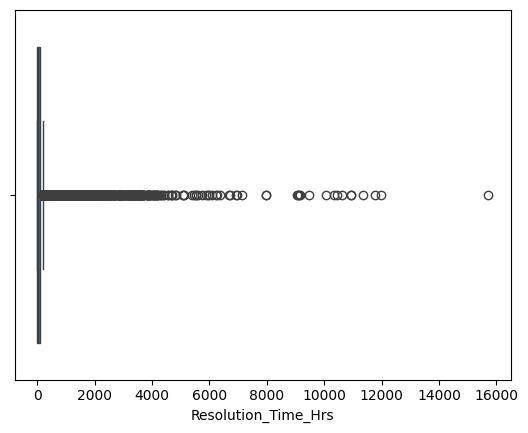

In [ ]:
sns.boxplot(x='Resolution_Time_Hrs',data=reassign_df)

In [ ]:
Q1 = reassign_df['Resolution_Time_Hrs'].quantile(0.25)
Q3 = reassign_df['Resolution_Time_Hrs'].quantile(0.75)
print("Q1:",Q1)
print("Q3:",Q3)

Q1: 1.1833333333333333
Q3: 75.25416666666666


In [ ]:
IQR = Q3 - Q1
print("IQR:",IQR)

IQR: 74.07083333333333


In [ ]:
low_bound = Q1 - 1.5 * IQR
up_bound = Q3 + 1.5 * IQR
print("Lower limit:",low_bound)
print("Upper limit:",up_bound)

Lower limit: -109.92291666666665
Upper limit: 186.36041666666665


In [ ]:
reassign_df = reassign_df[(reassign_df['Resolution_Time_Hrs']>=low_bound)&(reassign_df['Resolution_Time_Hrs']<=up_bound)]

In [ ]:
reassign_df.shape

(39385, 23)

In [ ]:
reassign_df['No_of_Reassignments'].value_counts()

,count
No_of_Reassignments,
0,26103
1,6298
2,4193
3,1447
4,963
5,381


In [ ]:
reassign_df['Resolution_Time_Hrs'].value_counts()

,count
Resolution_Time_Hrs,
0.033333,488
0.050000,372
0.016667,290
0.200000,228
0.133333,226
...,...
64.183333,1
95.700000,1
165.850000,1


In [ ]:
reassign_df[(reassign_df['No_of_Reassignments']>=2)&(reassign_df['Resolution_Time_Hrs']>=2)]

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,...,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day,Close_Month,Close_Weekday,Close_Day,RFC_Status
611,11,5,5,5,0.320040,1,3,2013-09-24 11:26:00,NaT,2013-10-01 10:56:00,...,1,167.500000,2013,9,1,24,10,1,1,1
640,1,4,4,4,0.938647,1,4,2013-09-24 14:36:00,NaT,2013-10-01 12:52:00,...,1,166.266667,2013,9,1,24,10,1,1,1
668,1,4,4,4,0.879646,1,2,2013-09-25 09:24:00,2013-10-01 12:23:00,2013-10-01 12:32:00,...,1,147.133333,2013,9,2,25,10,1,1,1
669,1,5,5,5,0.209876,3,4,2013-09-25 09:52:00,NaT,2013-10-01 17:07:00,...,1,151.266667,2013,9,2,25,10,1,1,1
677,1,5,5,5,0.899249,3,2,2013-09-25 09:44:00,NaT,2013-10-02 13:06:00,...,1,171.366667,2013,9,2,25,10,2,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46494,1,5,5,5,0.019994,3,4,2014-03-31 10:17:00,NaT,2014-03-31 15:44:00,...,1,5.450000,2014,3,0,31,3,0,31,1
46530,1,3,3,3,0.881966,1,2,2014-03-31 12:25:00,NaT,2014-03-31 15:52:00,...,1,3.466667,2014,3,0,31,3,0,31,1
46535,11,4,4,4,0.210568,1,2,2014-03-31 13:12:00,NaT,2014-03-31 15:50:00,...,1,2.650000,2014,3,0,31,3,0,31,1
46558,1,5,5,5,0.860299,1,5,2014-03-31 13:02:00,NaT,NaT,...,1,2.366667,2014,3,0,31,3,0,31,1


In [ ]:
reassign_df.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Open_Time,Reopen_Time,Resolved_Time,...,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day,Close_Month,Close_Weekday,Close_Day,RFC_Status
596,1,4,4,4,0.921050,1,0,2013-09-24 10:40:00,NaT,2013-10-01 10:10:00,...,1,167.500000,2013,9,1,24,10,1,1,0
599,1,3,3,3,0.769927,1,0,2013-09-24 10:14:00,NaT,2013-10-01 12:16:00,...,1,170.033333,2013,9,1,24,10,1,1,0
611,11,5,5,5,0.320040,1,3,2013-09-24 11:26:00,NaT,2013-10-01 10:56:00,...,1,167.500000,2013,9,1,24,10,1,1,1
640,1,4,4,4,0.938647,1,4,2013-09-24 14:36:00,NaT,2013-10-01 12:52:00,...,1,166.266667,2013,9,1,24,10,1,1,1
658,3,5,5,5,0.926729,1,0,2013-09-24 15:59:00,2013-10-01 11:08:00,2013-10-01 12:18:00,...,1,164.333333,2013,9,1,24,10,1,1,0


In [ ]:
reassign_df.shape

(39385, 23)

In [ ]:
rfc_x = reassign_df.drop(columns=['Open_Time', 'Reopen_Time', 'Resolved_Time','Close_Time','RFC_Status'],axis=1)
rfc_y = reassign_df['RFC_Status']

In [ ]:
print(rfc_x.shape)
print(rfc_y.shape)

(39385, 18)
(39385,)


In [ ]:
X_train,X_test,y_train,y_test = train_test_split(rfc_x,rfc_y,test_size=0.2,random_state=42)

In [ ]:
model = RandomForestClassifier()
model.fit(X_train,y_train)

RandomForestClassifier()

In [ ]:
y_pred = model.predict(X_test)

In [ ]:
accuracy_score(y_test,y_pred)

1.0

In [ ]:
confusion_matrix(y_test,y_pred)

array([[6441,    0],
       [   0, 1436]])

In [ ]:
X_test.head()

,CI_Cat,Impact,Urgency,Priority,number_cnt,Category,No_of_Reassignments,Closure_Code,No_of_Related_Interactions,Priority_Status,Resolution_Time_Hrs,Open_Year,Open_Month,Open_Weekday,Open_Day,Close_Month,Close_Weekday,Close_Day
904,1,5,5,5,0.296496,1,3,10,1,1,143.633333,2013,9,4,27,10,3,3
35860,1,1,3,1,0.014349,1,0,1,1,0,2.816667,2014,2,2,12,2,2,12
42261,11,4,4,4,0.577802,1,0,12,1,1,0.466667,2014,3,1,11,3,1,11
8191,1,5,5,5,0.904090,3,5,6,1,1,93.766667,2013,10,4,25,10,1,29
30682,1,5,5,5,0.256325,3,0,5,1,1,2.450000,2014,1,4,24,1,4,24


In [ ]:
y_test.head()

,RFC_Status
904,1
35860,0
42261,0
8191,1
30682,0


In [ ]:
def rfc(a):
  if a == 1:
    return 'Need Request For Change(RFC) to avoid possible failure'
  else:
    return 'No need of Request For Change'

In [ ]:
new_pred = model.predict([[1,5,5,5,0.296496,1,3,10,1,1,143.633333,2013,9,4,27,10,3,3]])
new_pred

array([1])

In [ ]:
rfc(new_pred)

'Need Request For Change(RFC) to avoid possible failure'

All of the Business case problems such as

*   Predicting High Priority Tickets
*   Forecast the incident volume in different fields - Quarterly, Annually
*   Auto tag the tickets with right priorities and right departments
*   Predict RFC (Request for change) and possible failure.

Designed and implemented end-to-end ML solutions for IT Service Management (ITSM) processes, aligned with business needs and customer experience improvement.

The major challenge that was faced while working on this entire Project have been followed.
1. There is no equal distribution of data for every department/categories. There are about 10 departments but only 3 to 4 departments holds majority of data and other departments holds very less number of data and also 1 or 2 departments holds the data counts in one digit.

2. Some features are eliminated due to lack of information, no meaning and empty values.

 Batch : 16-DEC-24-CDS-BUN-021-WDM0900-CBE